<a href="https://colab.research.google.com/github/prerana1008/-Intrusion-Detection-System/blob/main/Final_P_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Mount Google Drive
drive.mount('/content/drive')

# Load datasets
train_df = pd.read_csv('/content/drive/MyDrive/DATASET/rosids_train_augmented.csv', low_memory=False)
test_df = pd.read_csv('/content/drive/MyDrive/DATASET/rosids_test_augmented.csv', low_memory=False)

# --- Data Cleaning ---
# Strip whitespace from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Convert 'Label' column to string type
train_df['Label'] = train_df['Label'].astype(str)
test_df['Label'] = test_df['Label'].astype(str)

# Remove duplicate columns
train_df = train_df.loc[:, ~train_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Convert all string columns to lowercase and strip whitespace
for df in [train_df, test_df]:
    str_cols = df.select_dtypes(include=['object']).columns
    df[str_cols] = df[str_cols].apply(lambda x: x.str.strip().str.lower())
# Fix column name inconsistencies
column_mapping = {
    'Flow ID': 'Flow ID',
    'Source IP': 'Source IP',
    'Src IP': 'Source IP',
    'Source Port': 'Source Port',
    'Src Port': 'Source Port',
    'Destination IP': 'Destination IP',
    'Dst IP': 'Destination IP',
    'Destination Port': 'Destination Port',
    'Dst Port': 'Destination Port',
    'Protocol': 'Protocol',
    'Timestamp': 'Timestamp',
    'Flow Duration': 'Flow Duration',
    'Total Fwd Packets': 'Total Fwd Packets',
    'Tot Fwd Pkts': 'Total Fwd Packets',
    'Total Backward Packets': 'Total Backward Packets',
    'Tot Bwd Pkts': 'Total Backward Packets',
    'Total Length of Fwd Packets': 'Fwd Packets Length Total',
    'TotLen Fwd Pkts': 'Fwd Packets Length Total',
    'Total Length of Bwd Packets': 'Bwd Packets Length Total',
    'TotLen Bwd Pkts': 'Bwd Packets Length Total',
    'Fwd Packet Length Max': 'Fwd Packet Length Max',
    'Fwd Pkt Len Max': 'Fwd Packet Length Max',
    'Fwd Packet Length Min': 'Fwd Packet Length Min',
    'Fwd Pkt Len Min': 'Fwd Packet Length Min',
    'Fwd Packet Length Mean': 'Fwd Packet Length Mean',
    'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
    'Fwd Packet Length Std': 'Fwd Packet Length Std',
    'Fwd Pkt Len Std': 'Fwd Packet Length Std',
    'Bwd Packet Length Max': 'Bwd Packet Length Max',
    'Bwd Pkt Len Max': 'Bwd Packet Length Max',
    'Bwd Packet Length Min': 'Bwd Packet Length Min',
    'Bwd Pkt Len Min': 'Bwd Packet Length Min',
    'Bwd Packet Length Mean': 'Bwd Packet Length Mean',
    'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
    'Bwd Packet Length Std': 'Bwd Packet Length Std',
    'Bwd Pkt Len Std': 'Bwd Packet Length Std',
    'Flow Bytes/s': 'Flow Bytes/s',
    'Flow Byts/s': 'Flow Bytes/s',
    'Flow Packets/s': 'Flow Packets/s',
    'Flow Pkts/s': 'Flow Packets/s',
    'Flow IAT Mean': 'Flow IAT Mean',
    'Flow IAT Std': 'Flow IAT Std',
    'Flow IAT Max': 'Flow IAT Max',
    'Flow IAT Min': 'Flow IAT Min',
    'Fwd IAT Total': 'Fwd IAT Total',
    'Fwd IAT Tot': 'Fwd IAT Total',
    'Fwd IAT Mean': 'Fwd IAT Mean',
    'Fwd IAT Std': 'Fwd IAT Std',
    'Fwd IAT Max': 'Fwd IAT Max',
    'Fwd IAT Min': 'Fwd IAT Min',
    'Bwd IAT Total': 'Bwd IAT Total',
    'Bwd IAT Tot': 'Bwd IAT Total',
    'Bwd IAT Mean': 'Bwd IAT Mean',
    'Bwd IAT Std': 'Bwd IAT Std',
    'Bwd IAT Max': 'Bwd IAT Max',
    'Bwd IAT Min': 'Bwd IAT Min',
    'Fwd PSH Flags': 'Fwd PSH Flags',
    'Bwd PSH Flags': 'Bwd PSH Flags',
    'Fwd URG Flags': 'Fwd URG Flags',
    'Bwd URG Flags': 'Bwd URG Flags',
    'Fwd Header Length': 'Fwd Header Length',
    'Fwd Header Len': 'Fwd Header Length',
    'Bwd Header Length': 'Bwd Header Length',
    'Bwd Header Len': 'Bwd Header Length',
    'Fwd Packets/s': 'Fwd Packets/s',
    'Fwd Pkts/s': 'Fwd Packets/s',
    'Bwd Packets/s': 'Bwd Packets/s',
    'Bwd Pkts/s': 'Bwd Packets/s',
    'Min Packet Length': 'Packet Length Min',
    'Pkt Len Min': 'Packet Length Min',
    'Max Packet Length': 'Packet Length Max',
    'Pkt Len Max': 'Packet Length Max',
    'Packet Length Mean': 'Packet Length Mean',
    'Pkt Len Mean': 'Packet Length Mean',
    'Packet Length Std': 'Packet Length Std',
    'Pkt Len Std': 'Packet Length Std',
    'Packet Length Variance': 'Packet Length Variance',
    'Pkt Len Var': 'Packet Length Variance',
    'FIN Flag Count': 'FIN Flag Count',
    'FIN Flag Cnt': 'FIN Flag Count',
    'SYN Flag Count': 'SYN Flag Count',
    'SYN Flag Cnt': 'SYN Flag Count',
    'RST Flag Count': 'RST Flag Count',
    'RST Flag Cnt': 'RST Flag Count',
    'PSH Flag Count': 'PSH Flag Count',
    'PSH Flag Cnt': 'PSH Flag Count',
    'ACK Flag Count': 'ACK Flag Count',
    'ACK Flag Cnt': 'ACK Flag Count',
    'URG Flag Count': 'URG Flag Count',
    'URG Flag Cnt': 'URG Flag Count',
    'CWE Flag Count': 'CWE Flag Count',
    'CWE Flag Cnt': 'CWE Flag Count',
    'ECE Flag Count': 'ECE Flag Count',
    'ECE Flag Cnt': 'ECE Flag Count',
    'Down/Up Ratio': 'Down/Up Ratio',
    'Average Packet Size': 'Avg Packet Size',
    'Pkt Size Avg': 'Avg Packet Size',
    'Avg Fwd Segment Size': 'Avg Fwd Segment Size',
    'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size': 'Avg Bwd Segment Size',
    'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
    'Fwd Avg Bytes/Bulk': 'Fwd Avg Bytes/Bulk',
    'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
    'Fwd Avg Packets/Bulk': 'Fwd Avg Packets/Bulk',
    'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
    'Fwd Avg Bulk Rate': 'Fwd Avg Bulk Rate',
    'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk': 'Bwd Avg Bytes/Bulk',
    'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
    'Bwd Avg Packets/Bulk': 'Bwd Avg Packets/Bulk',
    'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
    'Bwd Avg Bulk Rate': 'Bwd Avg Bulk Rate',
    'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
    'Subflow Fwd Packets': 'Subflow Fwd Packets',
    'Subflow Fwd Pkts': 'Subflow Fwd Packets',
    'Subflow Fwd Bytes': 'Subflow Fwd Bytes',
    'Subflow Fwd Byts': 'Subflow Fwd Bytes',
    'Subflow Bwd Packets': 'Subflow Bwd Packets',
    'Subflow Bwd Pkts': 'Subflow Bwd Packets',
    'Subflow Bwd Bytes': 'Subflow Bwd Bytes',
    'Subflow Bwd Byts': 'Subflow Bwd Bytes',
    'Init Win Bytes': 'Init Win Bytes',
    'Init Bwd Win Bytes': 'Init Bwd Win Bytes',
    'Act Data Packets': 'Act Data Packets',
    'Active Data Pkts': 'Act Data Packets',
    'Init Fwd Win Bytes': 'Init Fwd Win Bytes',
    'Init Fwd Win Bytes': 'Init Fwd Win Bytes',
    'Fwd Avg Bytes/bulk': 'Fwd Avg Bytes/bulk',
    'Fwd Avg Bytes/bulk': 'Fwd Avg Bytes/bulk'
}
train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# Drop unnecessary columns
drop_columns = [
    "Flow ID", "Fwd Header Length.1",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp", "Unnamed: 0", "Inbound", "SimillarHTTP"
]
train_df.drop(columns=[col for col in drop_columns if col in train_df.columns], errors='ignore', inplace=True)
test_df.drop(columns=[col for col in drop_columns if col in test_df.columns], errors='ignore', inplace=True)

# Ensure train and test datasets have the same columns
common_cols = list(set(train_df.columns).intersection(set(test_df.columns)))
train_df = train_df[common_cols]
test_df = test_df[common_cols]

# --- Duplicate Handling ---
# Identify and remove overlapping rows between train and test datasets
duplicates = test_df[test_df.apply(tuple, axis=1).isin(train_df.apply(tuple, axis=1))]
test_df = test_df.loc[~test_df.apply(tuple, axis=1).isin(duplicates.apply(tuple, axis=1))]
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# --- Clean invalid label entries ---
valid_labels = ['0', '1']
train_df = train_df[train_df['Label'].isin(valid_labels)].copy()
test_df = test_df[test_df['Label'].isin(valid_labels)].copy()

# --- Ensure Label Column is Integer ---
train_df['Label'] = train_df['Label'].astype(int)
test_df['Label'] = test_df['Label'].astype(int)

# Verify binary label conversion
print("Train labels:", train_df['Label'].unique())
print("Test labels:", test_df['Label'].unique())

# --- Label Distribution Check ---
print("✅ Train Label Distribution:\n", train_df['Label'].value_counts())
print("✅ Test Label Distribution:\n", test_df['Label'].value_counts())

# --- Remove Constant Columns ---
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
train_df.drop(columns=constant_columns, inplace=True)
test_df.drop(columns=constant_columns, inplace=True)

# --- Handle Infinite Values and NaNs ---
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# --- Memory Optimization ---
def df_shrink(df):
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

train_df = df_shrink(train_df)
test_df = df_shrink(test_df)

# --- Final Check for Common Rows ---
common_rows = train_df.merge(test_df, how='inner')
if not common_rows.empty:
    print(f"⚠ Warning: {len(common_rows)} common rows still exist after filtering!")
else:
    print("✅ No common rows found after filtering!")

# --- Final Shuffle ---
train_df = shuffle(train_df, random_state=42).reset_index(drop=True)
test_df = shuffle(test_df, random_state=42).reset_index(drop=True)

print("✅ Data preprocessing complete!")

Mounted at /content/drive
Train labels: [0 1]
Test labels: [0 1]
✅ Train Label Distribution:
 Label
1    579578
0     44281
Name: count, dtype: int64
✅ Test Label Distribution:
 Label
1    145993
0     11276
Name: count, dtype: int64
✅ No common rows found after filtering!
✅ Data preprocessing complete!


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# ✅ Separate features and labels
X_train = train_df.drop(columns=['Label'])
y_train = train_df['Label']
X_test = test_df.drop(columns=['Label'])
y_test = test_df['Label']

# ✅ Check class distribution
print("\n✅ Label distribution in Training Set:")
print(y_train.value_counts())
print("\n✅ Label distribution in Testing Set:")
print(y_test.value_counts())

# ✅ Step 1: Preserve 'Source IP'
if 'Source IP' in X_train.columns and 'Source IP' in X_test.columns:
    train_source_ips = X_train[['Source IP']].reset_index(drop=True)
    test_source_ips = X_test[['Source IP']].reset_index(drop=True)
else:
    print("⚠️ Warning: 'Source IP' column not found! Using placeholder IPs.")
    train_source_ips = pd.DataFrame([f"192.168.1.{i}" for i in range(len(X_train))], columns=['Source IP'])
    test_source_ips = pd.DataFrame([f"192.168.1.{i}" for i in range(len(X_test))], columns=['Source IP'])

# ✅ Drop 'Source IP' from features
X_train = X_train.drop(columns=['Source IP'], errors='ignore')
X_test = X_test.drop(columns=['Source IP'], errors='ignore')

# ✅ Store no-PCA version for SHAP
X_train_no_pca = X_train.copy()
X_test_no_pca = X_test.copy()

# ✅ Flatten y_train
y_train = y_train.values.ravel()

# ✅ Convert everything to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# ✅ Identify numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"✅ Numeric columns: {numeric_columns}")

# ✅ Replace Inf with NaN
X_train[numeric_columns] = X_train[numeric_columns].replace([np.inf, -np.inf], np.nan)
X_test[numeric_columns] = X_test[numeric_columns].replace([np.inf, -np.inf], np.nan)

# ✅ Drop rows with NaNs and sync all arrays — RESET ALL INDICES FIRST!
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train_no_pca = X_train_no_pca.reset_index(drop=True)
X_test_no_pca = X_test_no_pca.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
train_source_ips = train_source_ips.reset_index(drop=True)
test_source_ips = test_source_ips.reset_index(drop=True)

# ✅ Now build masks
mask_train = ~X_train[numeric_columns].isna().any(axis=1)
mask_test = ~X_test[numeric_columns].isna().any(axis=1)

# ✅ Apply masks safely
X_train = X_train[mask_train].reset_index(drop=True)
X_test = X_test[mask_test].reset_index(drop=True)
X_train_no_pca = X_train_no_pca[mask_train].reset_index(drop=True)
X_test_no_pca = X_test_no_pca[mask_test].reset_index(drop=True)
y_train = y_train[mask_train].reset_index(drop=True)
y_test = y_test[mask_test].reset_index(drop=True)
train_source_ips = train_source_ips[mask_train].reset_index(drop=True)
test_source_ips = test_source_ips[mask_test].reset_index(drop=True)

# ✅ Scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
print("✅ Scaling completed successfully!")

# ✅ Add back non-numeric columns (if any)
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_columns),
                           X_train.drop(columns=numeric_columns).reset_index(drop=True)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_columns),
                          X_test.drop(columns=numeric_columns).reset_index(drop=True)], axis=1)

# ✅ Save original feature names
original_feature_names = numeric_columns

# ✅ Apply PCA
num_features = len(numeric_columns)
n_components = min(20, num_features)
print(f"📢 Applying PCA with {n_components} components (original features: {num_features})")
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ✅ Explained variance
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"📌 Total Variance Explained by PCA: {explained_variance:.4f}")
if explained_variance < 0.80:
    print("⚠️ Warning: PCA is retaining less than 80% variance! Consider using more components.")

# ✅ Convert PCA arrays to DataFrames
pca_feature_names = [f"PCA_{i+1}" for i in range(n_components)]
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_feature_names)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_feature_names)

# ✅ Attach Source IP back
X_train_final = pd.concat([X_train_pca.reset_index(drop=True), train_source_ips], axis=1)
X_test_final = pd.concat([X_test_pca.reset_index(drop=True), test_source_ips], axis=1)

# ✅ Confirm shape alignment
assert len(X_train_final) == len(y_train), "❌ Length mismatch in training set"
assert len(X_test_final) == len(y_test), "❌ Length mismatch in testing set"
print("✅ Final data ready for model!")

# ✅ Clean test labels if needed
y_test = y_test.replace({"Normal": 0, "Anomaly": 1}).astype(int)
print(f"✅ Final y_test class distribution: {y_test.value_counts().to_dict()}")

# ✅ Combine test data with labels for balancing
test_df_pca = X_test_final.copy()
test_df_pca['Label'] = y_test.values

# ✅ Split by class
test_df_normal = test_df_pca[test_df_pca['Label'] == 0]
test_df_attack = test_df_pca[test_df_pca['Label'] == 1]

# ✅ Downsample to balance
test_df_attack_downsampled = resample(
    test_df_attack,
    replace=False,
    n_samples=len(test_df_normal),
    random_state=42
)

# ✅ Combine and shuffle
test_df_balanced = pd.concat([test_df_normal, test_df_attack_downsampled])
test_df_balanced = test_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# ✅ Final split
X_test_final = test_df_balanced.drop(columns=['Label', 'Source IP'], errors='ignore')
y_test = test_df_balanced['Label'].astype(int)

print(f"📢 New Balanced Test Label Distribution: {y_test.value_counts().to_dict()}")


✅ Label distribution in Training Set:
Label
1    579536
0     44276
Name: count, dtype: int64

✅ Label distribution in Testing Set:
Label
1    145971
0     11272
Name: count, dtype: int64
✅ Numeric columns: ['Flow Packets/s', 'Fwd URG Flags', 'Total Fwd Packets', 'Bwd Packet Length Max', 'Fwd Packets Length Total', 'Fwd IAT Max', 'Packet Length Mean', 'Subflow Fwd Bytes', 'ACK Flag Count', 'Idle Mean', 'URG Flag Count', 'Bwd Avg Bulk Rate', 'Fwd IAT Min', 'Idle Std', 'Flow Bytes/s', 'Bwd PSH Flags', 'PSH Flag Count', 'Avg Fwd Segment Size', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd Avg Bytes/Bulk', 'Subflow Bwd Packets', 'Active Min', 'Flow IAT Min', 'Active Mean', 'Init Bwd Win Byts', 'Fwd Packet Length Max', 'Protocol', 'Fwd IAT Total', 'Flow Duration', 'Idle Min', 'Packet Length Min', 'Fwd Packet Length Min', 'Bwd Packets Length Total', 'Fwd Header Length', 'Fwd Packets/s', 'Avg Packet Size', 'Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Packet Length Variance', 'Bwd Header Length', 'Bw

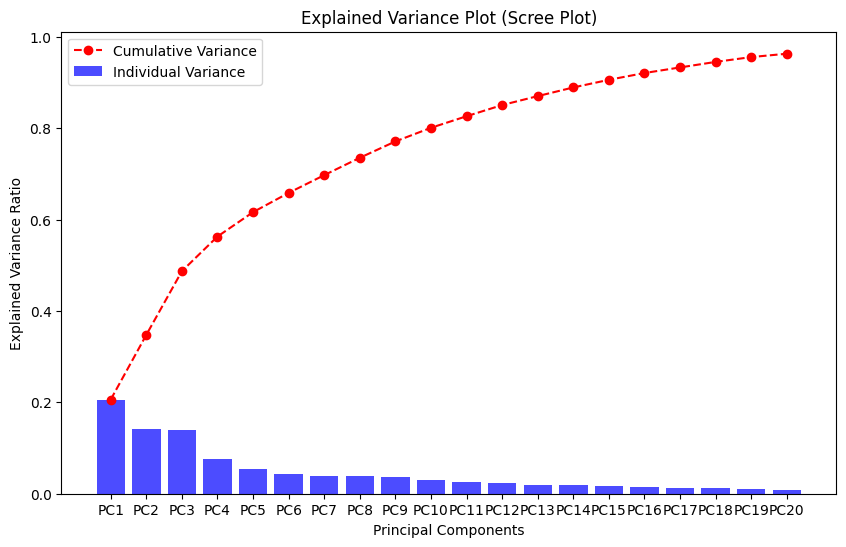

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Explained Variance Plot (Scree Plot)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label="Individual Variance")

# Line plot for cumulative explained variance
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance),
         color='red', marker='o', linestyle='--', label="Cumulative Variance")

# Title and labels
plt.title('Explained Variance Plot (Scree Plot)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

# Adjust x-axis ticks to be whole numbers with labels (PC1, PC2, ...)
num_components = len(explained_variance)
plt.xticks(np.arange(1, num_components + 1, 1), labels=[f"PC{i}" for i in range(1, num_components + 1)])

# Add legend
plt.legend()

plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Step 1: Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42,class_weight="balanced"),
    "Support Vector Machine (Two-Class)": SVC(random_state=42,class_weight="balanced"),
    "One-Class SVM": OneClassSVM(nu=0.1, kernel="rbf", gamma="scale", shrinking=False, cache_size=500),
    "Isolation Forest": IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
}
# ✅ Clear any existing metrics_dict from memory (in case you're re-running the cell)
metrics_dict.clear() if 'metrics_dict' in locals() else None
# ✅ Step 2: Store metrics
metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}


🔧 Training Random Forest...

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11272
           1       0.97      1.00      0.98     11272

    accuracy                           0.98     22544
   macro avg       0.98      0.98      0.98     22544
weighted avg       0.98      0.98      0.98     22544

🧩 Random Forest Confusion Matrix:
[[10938   334]
 [   19 11253]]

🔧 Training Logistic Regression...

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11272
           1       0.97      0.91      0.94     11272

    accuracy                           0.94     22544
   macro avg       0.94      0.94      0.94     22544
weighted avg       0.94      0.94      0.94     22544

🧩 Logistic Regression Confusion Matrix:
[[10907   365]
 [ 1045 10227]]

🔧 Training Support Vector Machine (Two-Class)...

📊 Support

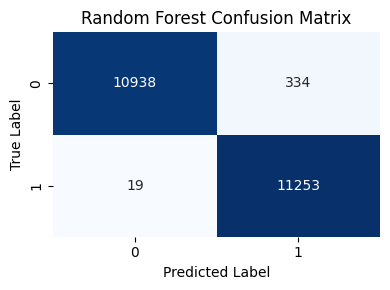

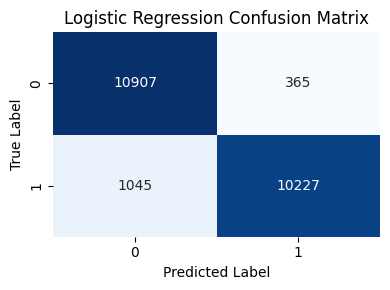

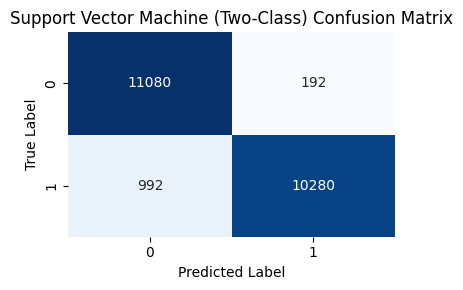

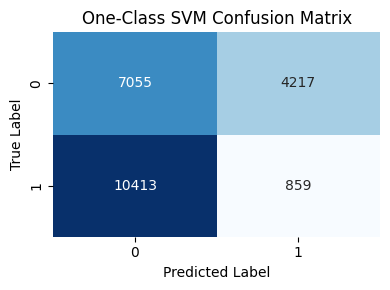

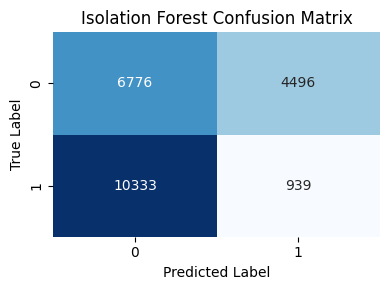

In [ ]:
for model_name, model in models.items():
    print(f"\n🔧 Training {model_name}...")

    if model_name == "One-Class SVM":
        sample_size = min(10000, len(X_train_pca))
        X_sample = X_train_pca[:sample_size]
        model.fit(X_sample)
        y_pred = model.predict(X_test_final)
        y_pred = [0 if val == 1 else 1 for val in y_pred]  # Change here: converting 1 to 0 and vice versa

        # Ensure y_test is trimmed to match y_pred length
        y_test_trimmed = y_test[:len(y_pred)]  # Change here: trimming y_test to match y_pred's length

    elif model_name == "Isolation Forest":
        model.fit(X_train_pca)
        y_pred = model.predict(X_test_final)
        y_pred = [0 if val == 1 else 1 for val in y_pred]  # Change here: converting 1 to 0 and vice versa

        # Ensure y_test is trimmed to match y_pred length
        y_test_trimmed = y_test[:len(y_pred)]  # Change here: trimming y_test to match y_pred's length

    elif model_name == "Support Vector Machine (Two-Class)":
        sample_size = min(10000, len(X_train_pca))
        X_sample = X_train_pca[:sample_size]
        y_sample = y_train[:sample_size]
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test_final)
        y_test_trimmed = y_test.iloc[:len(y_pred)]  # Keeping this to ensure y_test aligns with y_pred

    else:
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_final)
        y_test_trimmed = y_test.iloc[:len(y_pred)]  # Keeping this to ensure y_test aligns with y_pred

    acc = accuracy_score(y_test_trimmed, y_pred)
    prec = precision_score(y_test_trimmed, y_pred, zero_division=0)
    rec = recall_score(y_test_trimmed, y_pred, zero_division=0)
    f1 = f1_score(y_test_trimmed, y_pred, zero_division=0)

    metrics_dict["Model"].append(model_name)
    metrics_dict["Accuracy"].append(acc)
    metrics_dict["Precision"].append(prec)
    metrics_dict["Recall"].append(rec)
    metrics_dict["F1-Score"].append(f1)

    print(f"\n📊 {model_name} Classification Report:")
    print(classification_report(y_test_trimmed, y_pred, zero_division=0))

    cm = confusion_matrix(y_test_trimmed, y_pred)
    print(f"🧩 {model_name} Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()


✅ Final Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.984342,0.971175,0.998314,0.984558
1,Support Vector Machine (Two-Class),0.947480,0.981665,0.911994,0.945548
2,Logistic Regression,0.937456,0.965540,0.907292,0.935510
3,Isolation Forest,0.342220,0.172769,0.083304,0.112408
4,One-Class SVM,0.351047,0.169228,0.076207,0.105089


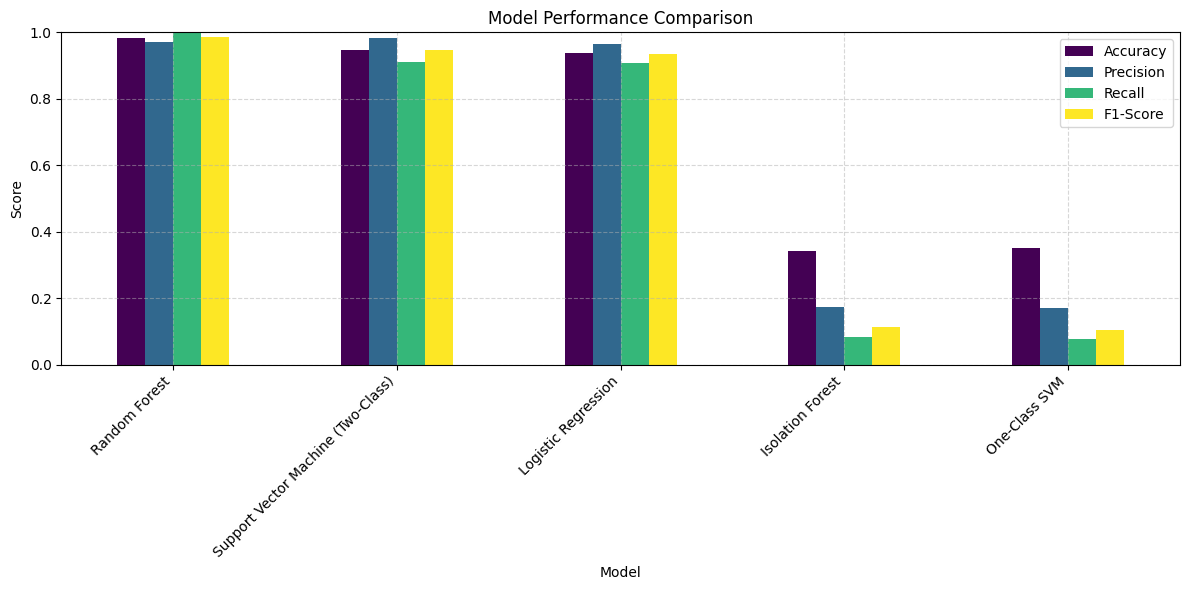

In [ ]:
# ✅ Step 4: Compare Models
metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
print("\n✅ Final Model Comparison Table:")
display(metrics_df)

# ✅ Step 5: Plot Metrics — FIXED plotting logic
metrics_df.set_index("Model").plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# ✅ FINAL CHECK BEFORE SHAP
print("\n✅ Final Shape Checks Before SHAP:")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_train shape: {y_train.shape} (should be 1D)")
print(f"y_test shape: {y_test.shape} (should be 1D)")


✅ Final Shape Checks Before SHAP:
X_train_pca shape: (623804, 20)
X_test_pca shape: (157243, 20)
y_train shape: (623804,) (should be 1D)
y_test shape: (22544,) (should be 1D)


In [ ]:
import pandas as pd

# ✅ Extract PCA loadings (Feature contributions to PCA components)
pca_loadings = pca.components_  # Shape: (num_pca_components, num_original_features)

# ✅ Convert to DataFrame (Ensures original features are mapped)
pca_loadings_df = pd.DataFrame(
    pca_loadings,
    columns=original_feature_names,  # Now correctly defined!
    index=[f"PCA_{i+1}" for i in range(len(pca.components_))]
)


🔍 Top 10 Features Contributing to Packet Length Variance:
PCA_1     0.242331
PCA_9     0.120759
PCA_4     0.111389
PCA_19    0.090853
PCA_6     0.086114
PCA_3     0.076666
PCA_5     0.044185
PCA_8     0.037955
PCA_17    0.031316
PCA_18    0.030755
Name: Packet Length Variance, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


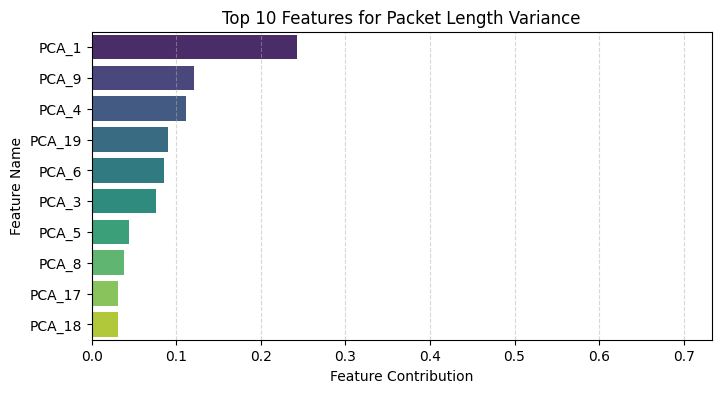


🔍 Top 10 Features Contributing to Subflow Fwd Bytes:
PCA_8     0.270773
PCA_2     0.223205
PCA_3     0.150745
PCA_10    0.117437
PCA_9     0.111289
PCA_6     0.109203
PCA_1     0.063884
PCA_11    0.061139
PCA_7     0.032846
PCA_12    0.032739
Name: Subflow Fwd Bytes, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


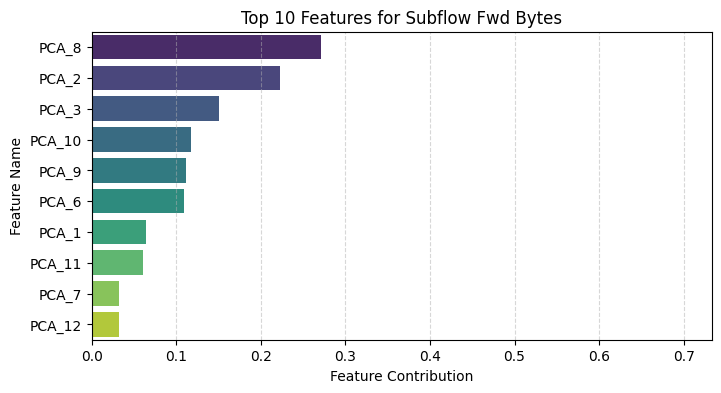


🔍 Top 10 Features Contributing to Subflow Fwd Packets:
PCA_2     0.255476
PCA_3     0.185535
PCA_4     0.093131
PCA_1     0.057703
PCA_9     0.047239
PCA_7     0.040286
PCA_19    0.036043
PCA_6     0.026880
PCA_14    0.018770
PCA_8     0.017938
Name: Subflow Fwd Packets, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


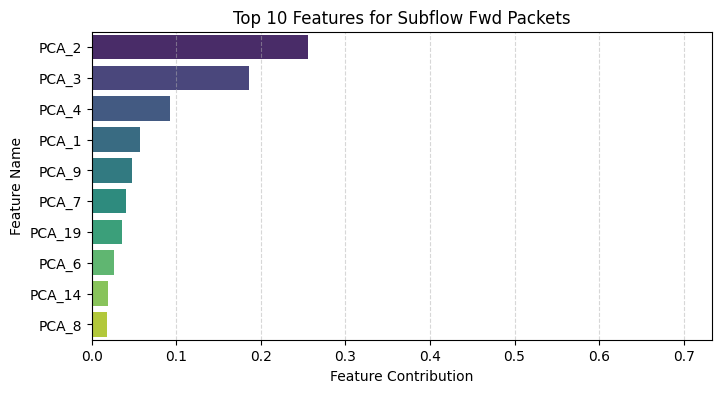


🔍 Top 10 Features Contributing to ACK Flag Count:
PCA_12    0.363905
PCA_6     0.228739
PCA_10    0.203065
PCA_2     0.145004
PCA_3     0.126738
PCA_15    0.122888
PCA_11    0.097425
PCA_18    0.088707
PCA_8     0.069969
PCA_16    0.068413
Name: ACK Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


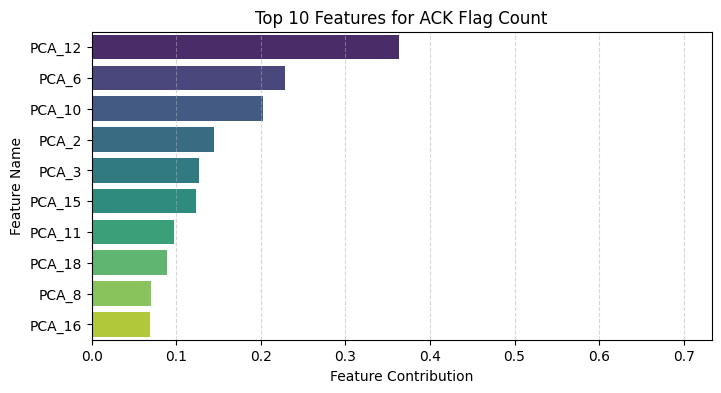


🔍 Top 10 Features Contributing to Idle Max:
PCA_3     0.255521
PCA_2     0.174229
PCA_16    0.119098
PCA_13    0.115969
PCA_11    0.087926
PCA_10    0.084542
PCA_19    0.070800
PCA_12    0.069242
PCA_8     0.054488
PCA_7     0.053586
Name: Idle Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


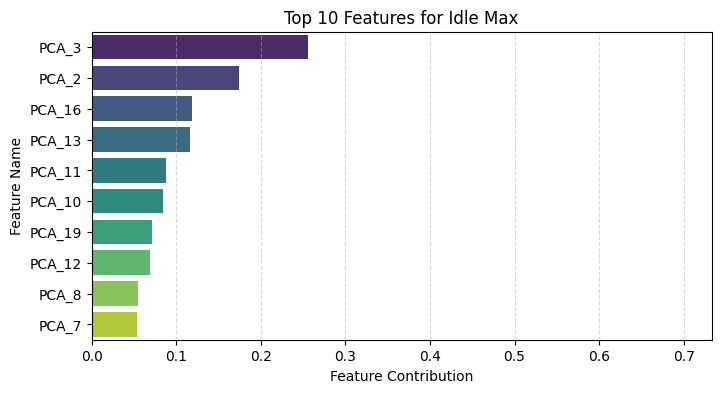


🔍 Top 10 Features Contributing to Packet Length Min:
PCA_4     0.361474
PCA_9     0.187070
PCA_8     0.129897
PCA_5     0.106713
PCA_1     0.096523
PCA_7     0.070036
PCA_16    0.068276
PCA_6     0.059416
PCA_12    0.050858
PCA_10    0.043434
Name: Packet Length Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


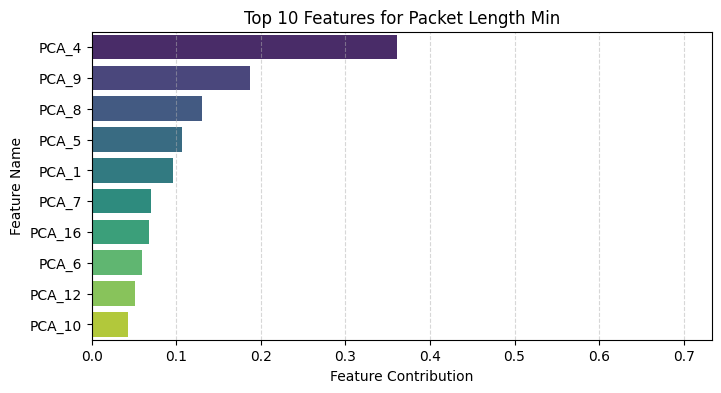


🔍 Top 10 Features Contributing to Fwd IAT Max:
PCA_5     0.358489
PCA_3     0.171423
PCA_11    0.160024
PCA_14    0.155793
PCA_16    0.135602
PCA_10    0.124021
PCA_2     0.110079
PCA_7     0.106484
PCA_17    0.089369
PCA_9     0.064184
Name: Fwd IAT Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


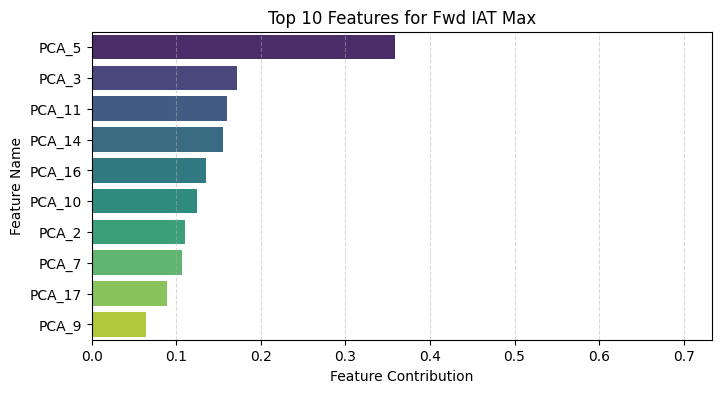


🔍 Top 10 Features Contributing to Avg Fwd Segment Size:
PCA_19    0.280859
PCA_1     0.242281
PCA_11    0.107051
PCA_18    0.105164
PCA_4     0.103847
PCA_5     0.081590
PCA_10    0.066949
PCA_9     0.064680
PCA_3     0.063176
PCA_16    0.059833
Name: Avg Fwd Segment Size, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


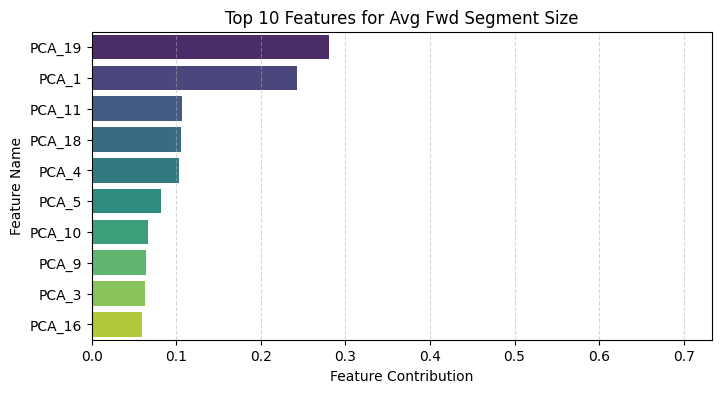

<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")



🔍 Top 10 Features Contributing to Total Backward Packets:
PCA_2     0.257652
PCA_3     0.184131
PCA_4     0.102507
PCA_1     0.051620
PCA_6     0.049330
PCA_7     0.044429
PCA_9     0.035656
PCA_19    0.028697
PCA_5     0.020273
PCA_16    0.015820
Name: Total Backward Packets, dtype: float64


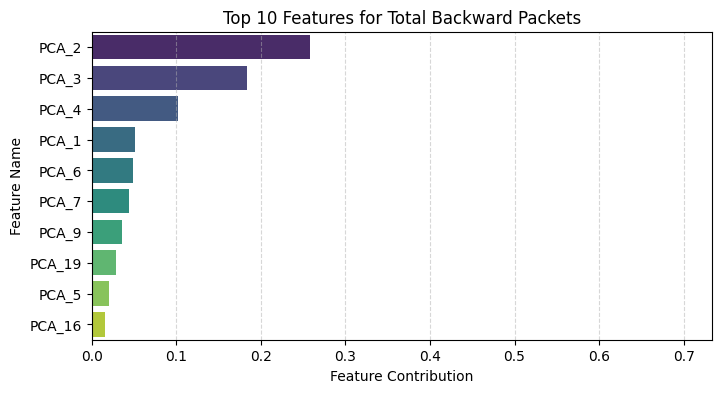


🔍 Top 10 Features Contributing to Bwd IAT Mean:
PCA_3     0.213380
PCA_5     0.203343
PCA_14    0.169474
PCA_2     0.156083
PCA_11    0.155720
PCA_10    0.097878
PCA_1     0.081523
PCA_13    0.075825
PCA_12    0.062096
PCA_9     0.057446
Name: Bwd IAT Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


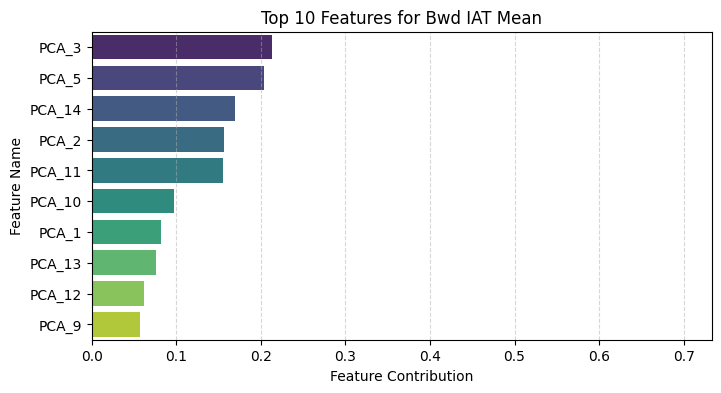


🔍 Top 10 Features Contributing to Init Fwd Win Byts:
PCA_19    3.885781e-16
PCA_17    2.775558e-16
PCA_20    1.951564e-16
PCA_10    1.179612e-16
PCA_16    1.110223e-16
PCA_11    9.020562e-17
PCA_5     8.326673e-17
PCA_12    8.326673e-17
PCA_14    6.331741e-17
PCA_6     5.551115e-17
Name: Init Fwd Win Byts, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


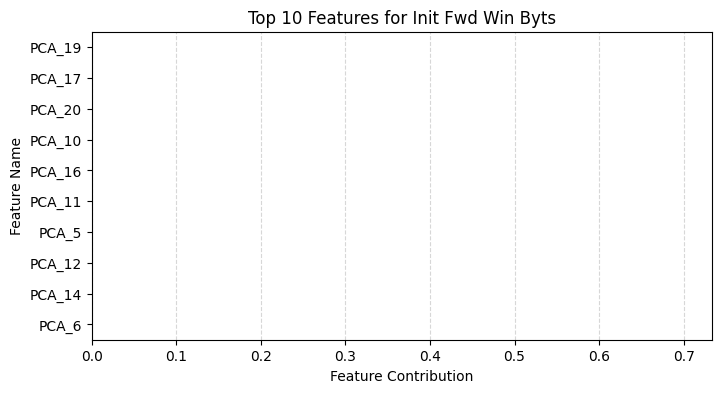


🔍 Top 10 Features Contributing to Fwd IAT Min:
PCA_17    0.649993
PCA_14    0.445431
PCA_13    0.319832
PCA_11    0.285917
PCA_10    0.199033
PCA_18    0.099210
PCA_19    0.092816
PCA_8     0.090840
PCA_5     0.052093
PCA_3     0.043201
Name: Fwd IAT Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


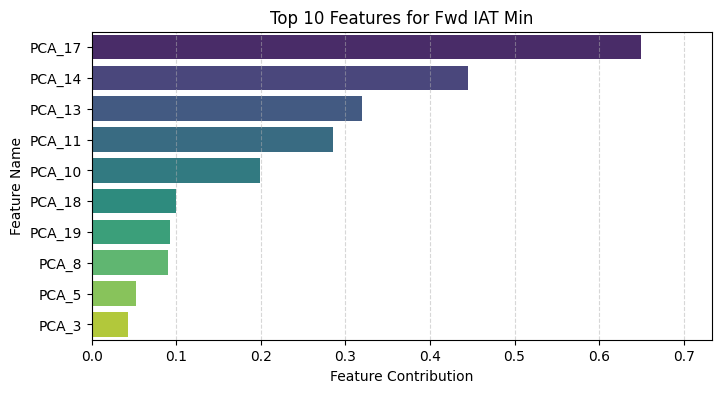


🔍 Top 10 Features Contributing to Down/Up Ratio:
PCA_5     0.305040
PCA_12    0.181545
PCA_9     0.166098
PCA_6     0.153934
PCA_18    0.147777
PCA_19    0.140893
PCA_1     0.101045
PCA_3     0.088636
PCA_10    0.083484
PCA_7     0.073126
Name: Down/Up Ratio, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


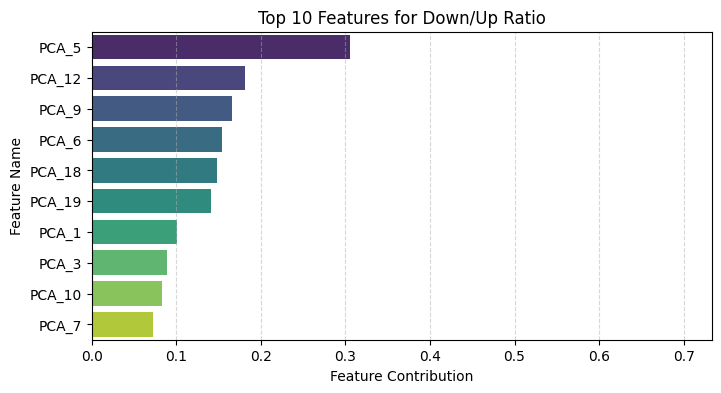


🔍 Top 10 Features Contributing to Flow IAT Max:
PCA_3     0.265756
PCA_2     0.175047
PCA_16    0.090112
PCA_5     0.078968
PCA_12    0.065385
PCA_14    0.059605
PCA_18    0.052909
PCA_7     0.045381
PCA_9     0.038939
PCA_1     0.035564
Name: Flow IAT Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


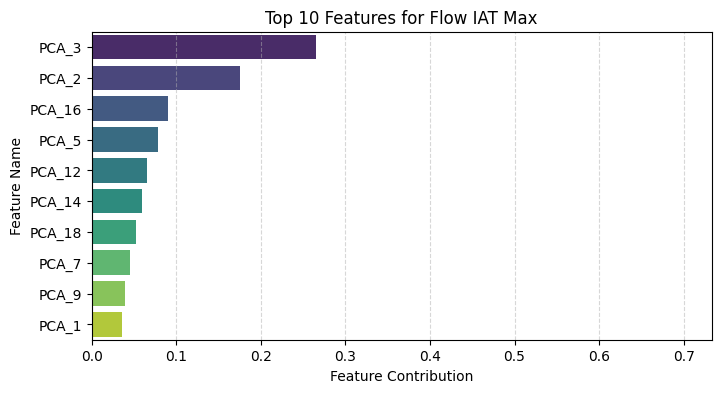


🔍 Top 10 Features Contributing to RST Flag Count:
PCA_18    0.723599
PCA_10    0.320721
PCA_11    0.302804
PCA_19    0.233754
PCA_12    0.203834
PCA_17    0.180607
PCA_6     0.114598
PCA_20    0.093646
PCA_9     0.091664
PCA_5     0.084770
Name: RST Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


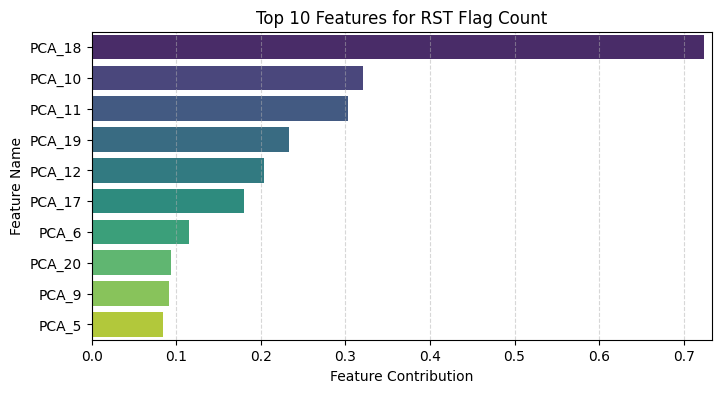


🔍 Top 10 Features Contributing to Flow IAT Mean:
PCA_10    0.256595
PCA_18    0.220358
PCA_3     0.209795
PCA_12    0.163772
PCA_11    0.160245
PCA_2     0.137108
PCA_5     0.112026
PCA_19    0.108147
PCA_16    0.098780
PCA_8     0.093659
Name: Flow IAT Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


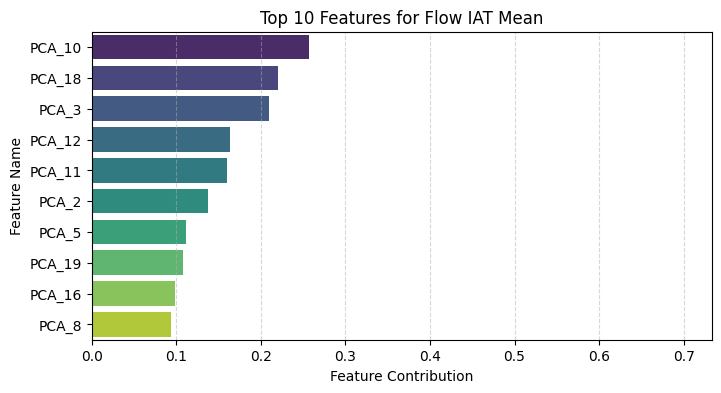


🔍 Top 10 Features Contributing to Bwd Packet Length Max:
PCA_1     0.219268
PCA_11    0.180189
PCA_5     0.166631
PCA_9     0.160491
PCA_6     0.153205
PCA_14    0.107076
PCA_8     0.103922
PCA_10    0.072449
PCA_18    0.058525
PCA_12    0.043667
Name: Bwd Packet Length Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


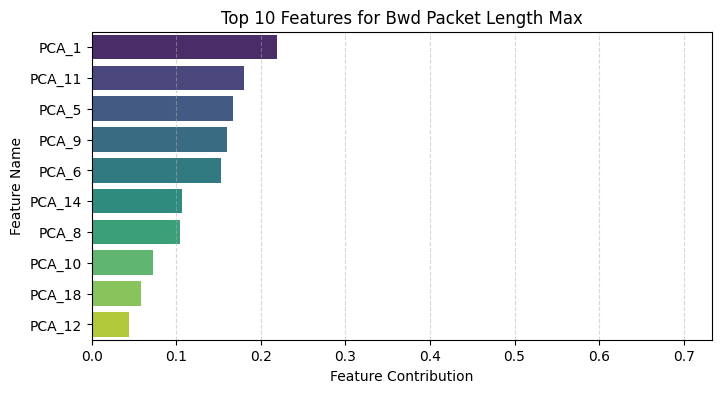


🔍 Top 10 Features Contributing to PSH Flag Count:
PCA_9     0.300135
PCA_8     0.295517
PCA_7     0.234586
PCA_10    0.230828
PCA_19    0.132389
PCA_2     0.127144
PCA_6     0.107424
PCA_12    0.098575
PCA_16    0.090141
PCA_4     0.083659
Name: PSH Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


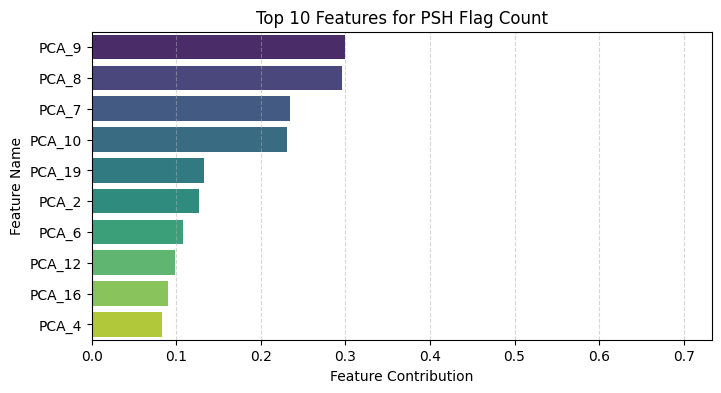


🔍 Top 10 Features Contributing to URG Flag Count:
PCA_17    1.387779e-16
PCA_14    1.368263e-16
PCA_15    1.318390e-16
PCA_8     1.110223e-16
PCA_7     1.110223e-16
PCA_20    1.040834e-16
PCA_11    6.938894e-17
PCA_10    5.551115e-17
PCA_19    4.163336e-17
PCA_16    4.163336e-17
Name: URG Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


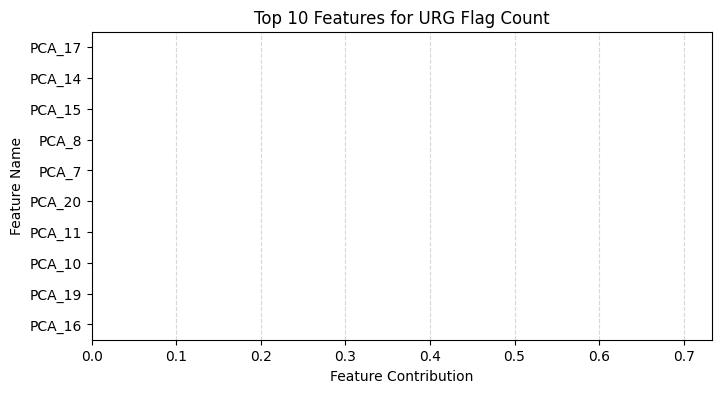


🔍 Top 10 Features Contributing to Bwd Packets/s:
PCA_15    0.455889
PCA_7     0.407925
PCA_6     0.263667
PCA_20    0.207421
PCA_9     0.176933
PCA_8     0.147025
PCA_16    0.097802
PCA_14    0.092908
PCA_13    0.092445
PCA_5     0.059356
Name: Bwd Packets/s, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


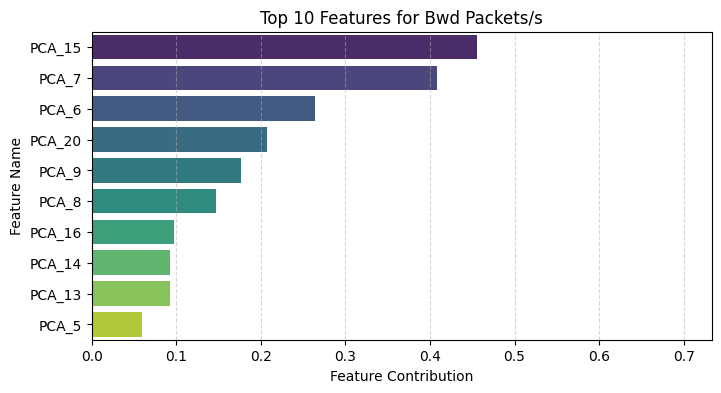


🔍 Top 10 Features Contributing to Bwd Packet Length Mean:
PCA_19    0.311892
PCA_4     0.201413
PCA_1     0.186423
PCA_5     0.173142
PCA_11    0.154630
PCA_18    0.134664
PCA_6     0.127000
PCA_8     0.097958
PCA_17    0.078021
PCA_10    0.076294
Name: Bwd Packet Length Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


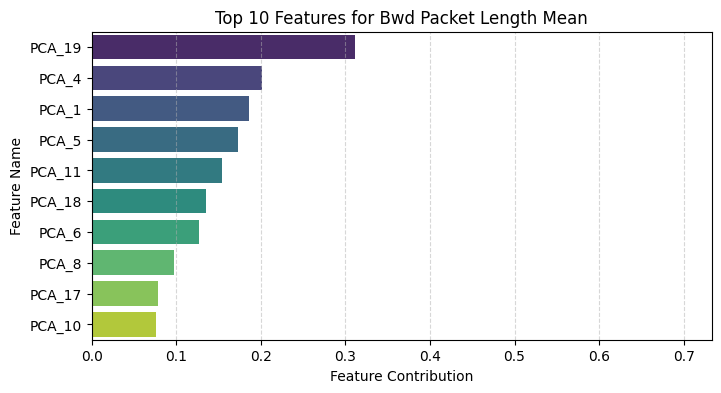


🔍 Top 10 Features Contributing to Protocol:
PCA_4     0.347824
PCA_9     0.178050
PCA_8     0.132591
PCA_5     0.107838
PCA_1     0.092778
PCA_16    0.077570
PCA_7     0.071594
PCA_6     0.054462
PCA_12    0.054402
PCA_18    0.050820
Name: Protocol, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


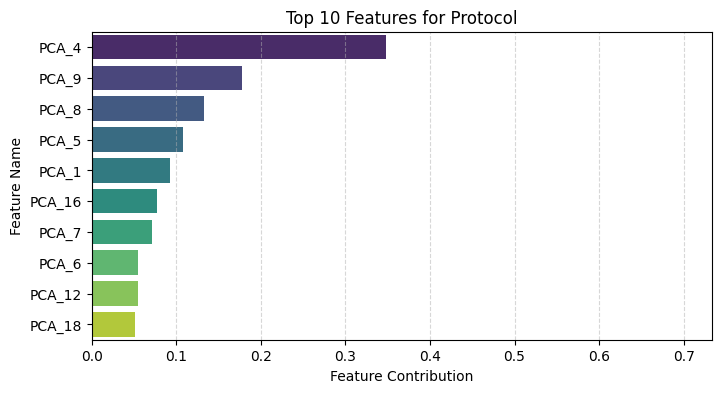


🔍 Top 10 Features Contributing to Bwd Packet Length Min:
PCA_4     0.352551
PCA_19    0.182272
PCA_9     0.165850
PCA_5     0.106180
PCA_1     0.096886
PCA_16    0.069760
PCA_12    0.064653
PCA_2     0.053682
PCA_7     0.051920
PCA_8     0.039507
Name: Bwd Packet Length Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


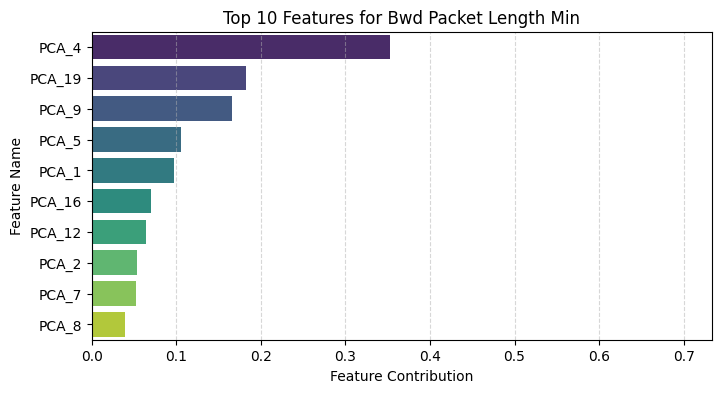


🔍 Top 10 Features Contributing to Fwd Packets/s:
PCA_20    0.733094
PCA_15    0.397773
PCA_7     0.347641
PCA_6     0.191899
PCA_9     0.155867
PCA_12    0.148669
PCA_13    0.143988
PCA_14    0.125606
PCA_8     0.116337
PCA_16    0.071963
Name: Fwd Packets/s, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


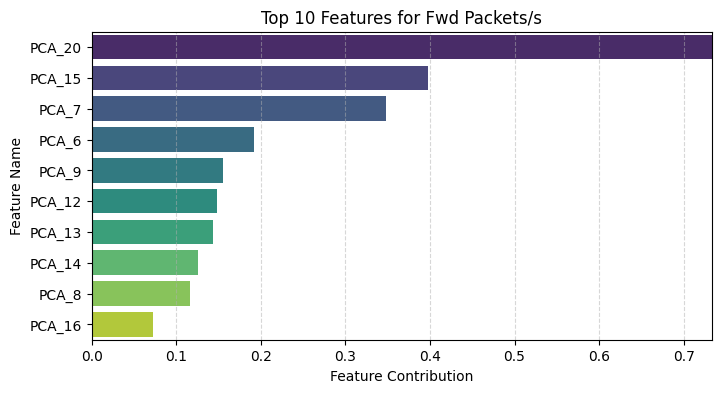


🔍 Top 10 Features Contributing to Fwd Avg Bulk Rate:
PCA_20    8.673617e-17
PCA_14    2.775558e-17
PCA_18    2.775558e-17
PCA_11    6.938894e-18
PCA_13    6.938894e-18
PCA_19    6.938894e-18
PCA_12    3.469447e-18
PCA_10    5.421011e-20
PCA_2     3.009266e-36
PCA_4     0.000000e+00
Name: Fwd Avg Bulk Rate, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


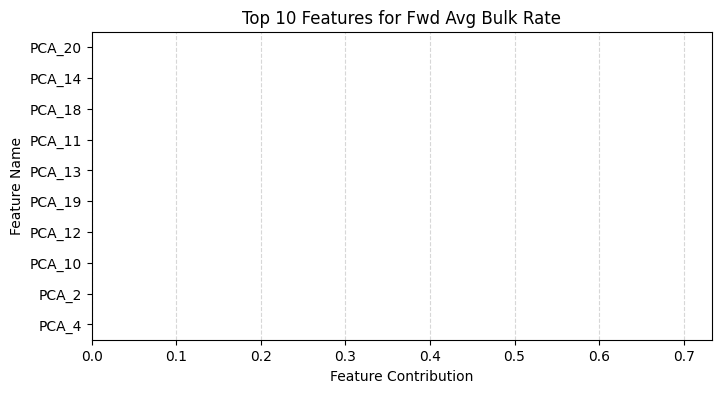


🔍 Top 10 Features Contributing to Fwd Packet Length Max:
PCA_1     0.255802
PCA_16    0.134042
PCA_13    0.085210
PCA_14    0.078480
PCA_11    0.071633
PCA_5     0.061626
PCA_4     0.057540
PCA_19    0.053891
PCA_3     0.050382
PCA_8     0.039562
Name: Fwd Packet Length Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


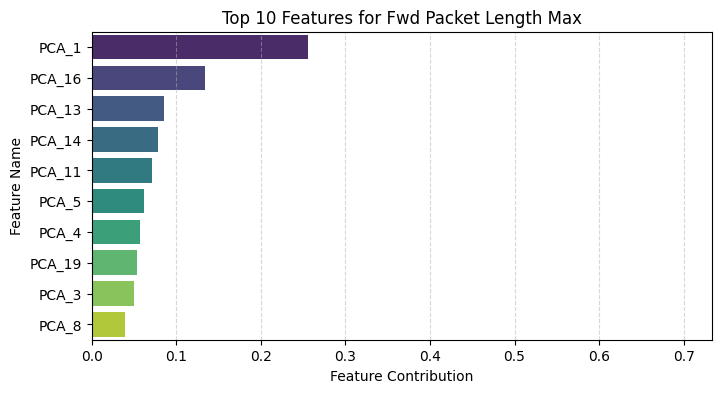


🔍 Top 10 Features Contributing to Fwd Seg Size Min:
PCA_20    1.110223e-16
PCA_14    8.326673e-17
PCA_15    6.938894e-18
PCA_19    3.469447e-18
PCA_4     0.000000e+00
PCA_3     0.000000e+00
PCA_2     0.000000e+00
PCA_1     0.000000e+00
PCA_5     0.000000e+00
PCA_6     0.000000e+00
Name: Fwd Seg Size Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


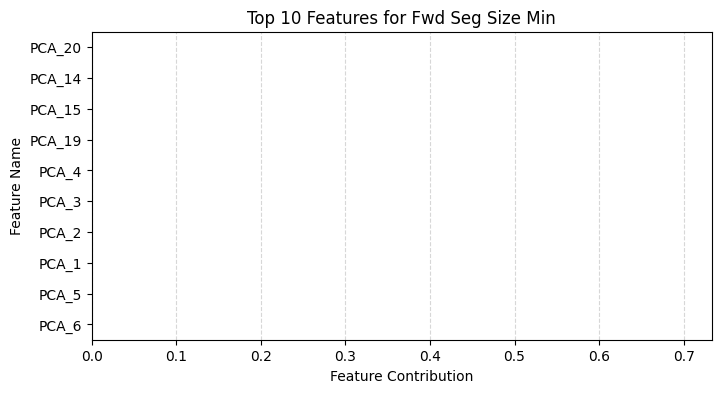


🔍 Top 10 Features Contributing to Fwd PSH Flags:
PCA_20    1.665335e-16
PCA_14    5.551115e-17
PCA_17    2.775558e-17
PCA_18    2.775558e-17
PCA_16    1.734723e-18
PCA_15    8.673617e-19
PCA_12    2.710505e-20
PCA_10    1.058791e-22
PCA_7     2.646978e-23
PCA_8     1.323489e-23
Name: Fwd PSH Flags, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


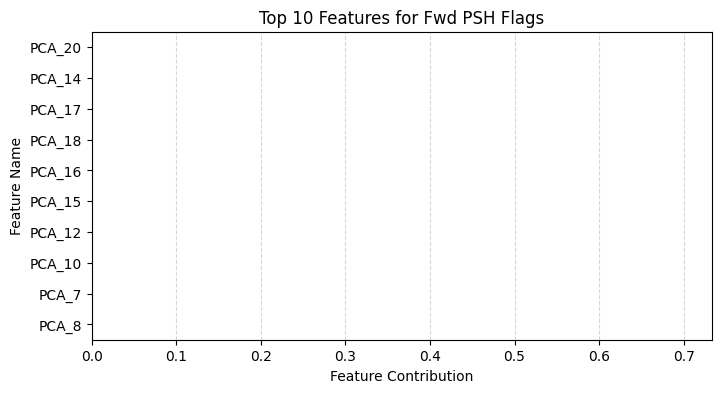


🔍 Top 10 Features Contributing to Flow Packets/s:
PCA_7     0.453205
PCA_15    0.304397
PCA_6     0.284503
PCA_9     0.197879
PCA_8     0.161042
PCA_16    0.068739
PCA_5     0.067498
PCA_14    0.050586
PCA_13    0.045449
PCA_10    0.044145
Name: Flow Packets/s, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


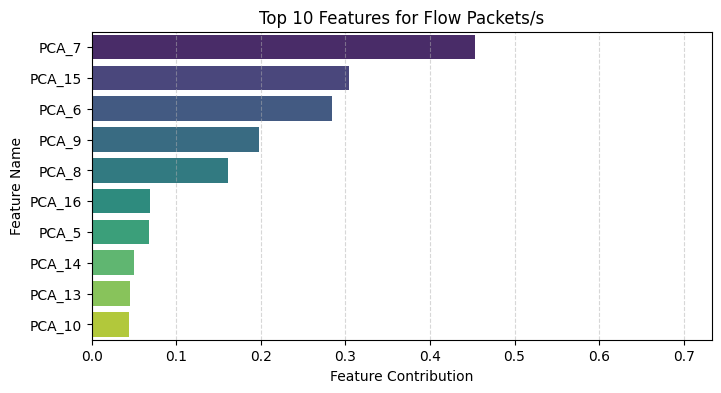


🔍 Top 10 Features Contributing to Bwd Avg Bytes/Bulk:
PCA_20    1.110223e-16
PCA_17    5.551115e-17
PCA_15    3.469447e-18
PCA_19    1.734723e-18
PCA_13    6.505213e-19
PCA_12    6.776264e-21
PCA_11    3.388132e-21
PCA_7     4.135903e-25
PCA_9     1.033976e-25
PCA_6     1.615587e-27
Name: Bwd Avg Bytes/Bulk, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


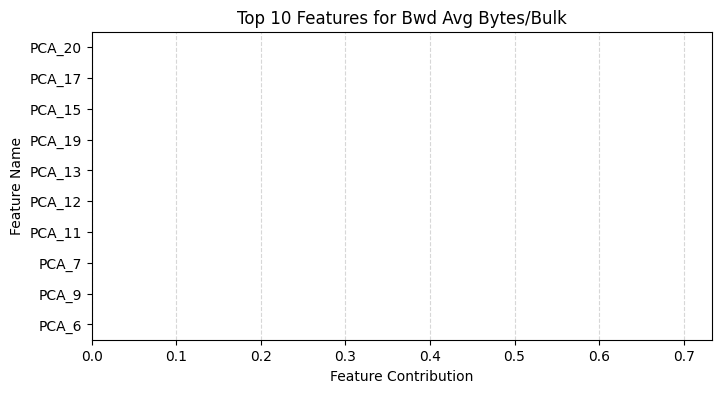


🔍 Top 10 Features Contributing to Bwd IAT Total:
PCA_1     0.187034
PCA_8     0.166190
PCA_4     0.163869
PCA_9     0.151375
PCA_7     0.123861
PCA_19    0.120394
PCA_2     0.116025
PCA_12    0.087575
PCA_3     0.059875
PCA_6     0.045515
Name: Bwd IAT Total, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


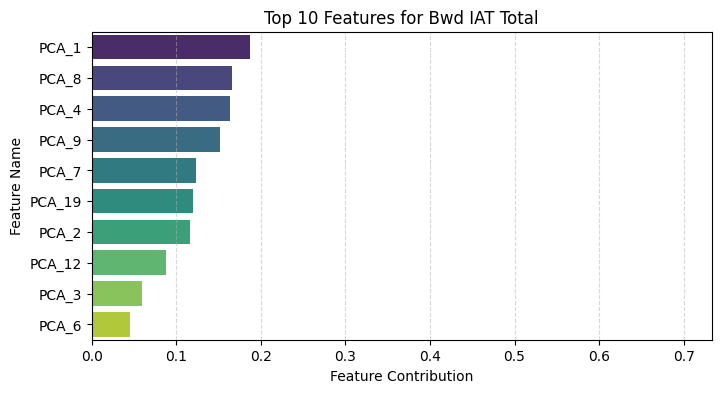


🔍 Top 10 Features Contributing to Bwd Avg Packets/Bulk:
PCA_20    5.551115e-17
PCA_17    1.734723e-18
PCA_14    8.673617e-19
PCA_15    5.421011e-20
PCA_16    2.710505e-20
PCA_11    2.646978e-23
PCA_12    2.646978e-23
PCA_8     8.077936e-28
PCA_7     8.077936e-28
PCA_6     1.577722e-30
Name: Bwd Avg Packets/Bulk, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


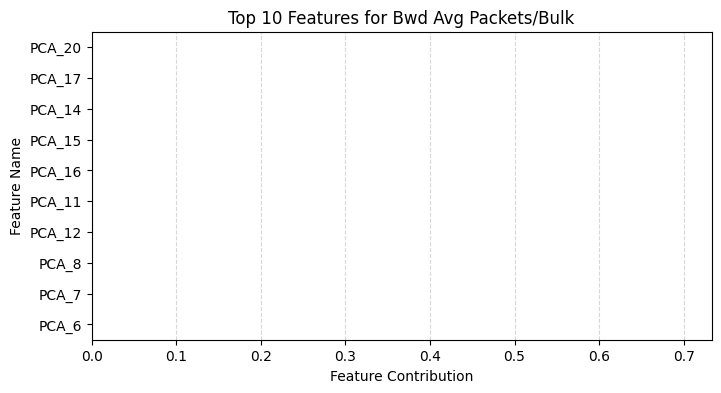


🔍 Top 10 Features Contributing to Bwd PSH Flags:
PCA_9     0.300135
PCA_8     0.295517
PCA_7     0.234586
PCA_10    0.230828
PCA_19    0.132389
PCA_2     0.127144
PCA_6     0.107424
PCA_12    0.098575
PCA_16    0.090141
PCA_4     0.083659
Name: Bwd PSH Flags, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


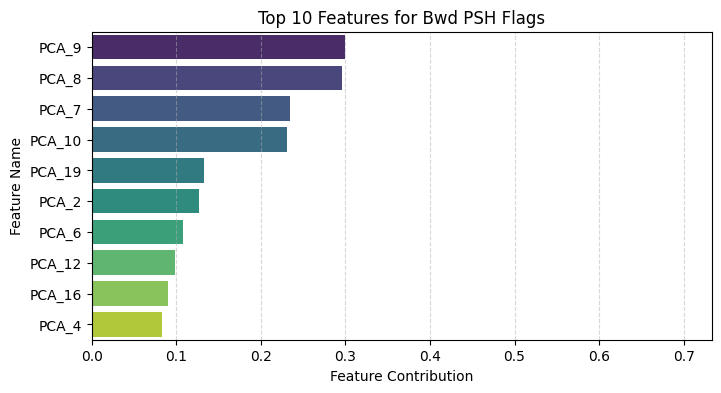


🔍 Top 10 Features Contributing to Active Min:
PCA_6     0.304886
PCA_12    0.251011
PCA_9     0.221810
PCA_7     0.217905
PCA_10    0.204823
PCA_8     0.172786
PCA_14    0.149445
PCA_16    0.145278
PCA_13    0.117579
PCA_1     0.098851
Name: Active Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


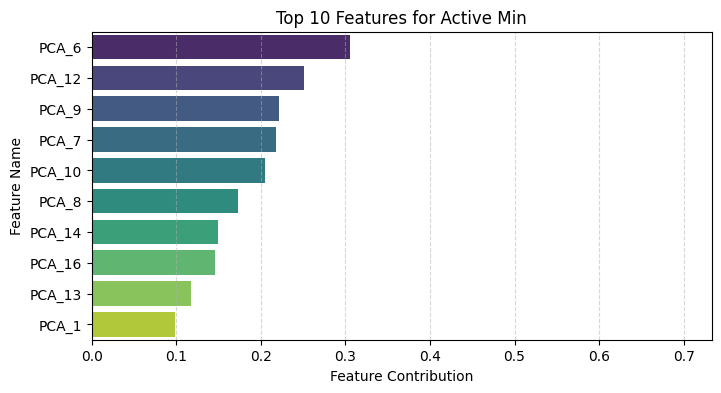


🔍 Top 10 Features Contributing to Subflow Bwd Packets:
PCA_2     0.257652
PCA_3     0.184131
PCA_4     0.102507
PCA_1     0.051620
PCA_6     0.049330
PCA_7     0.044429
PCA_9     0.035656
PCA_19    0.028697
PCA_5     0.020273
PCA_16    0.015820
Name: Subflow Bwd Packets, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


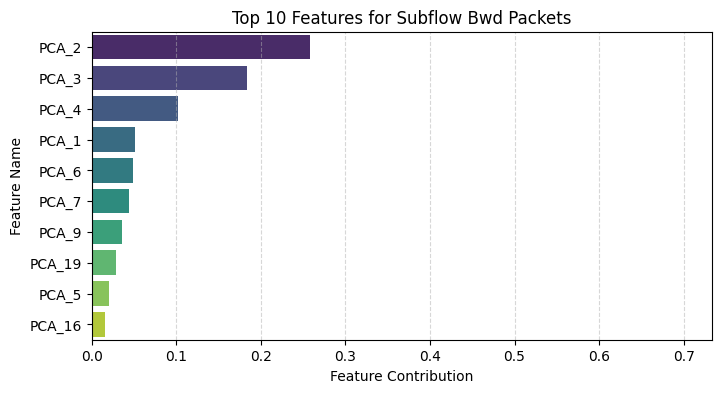

<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")



🔍 Top 10 Features Contributing to Fwd Header Length:
PCA_2     0.254241
PCA_3     0.185356
PCA_4     0.104320
PCA_1     0.055215
PCA_9     0.042348
PCA_7     0.039115
PCA_19    0.037341
PCA_6     0.028948
PCA_14    0.018204
PCA_16    0.016150
Name: Fwd Header Length, dtype: float64


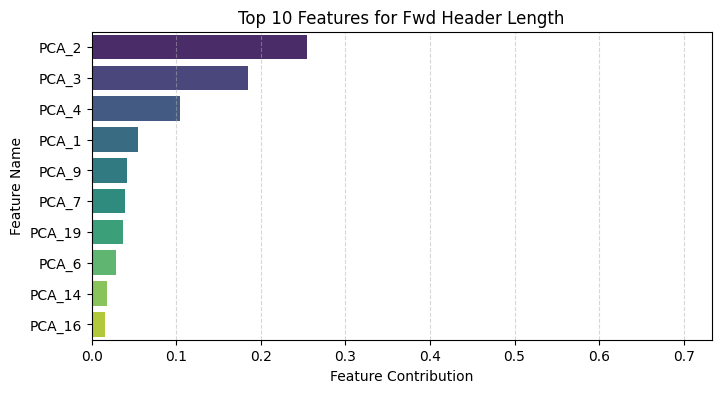


🔍 Top 10 Features Contributing to Bwd IAT Min:
PCA_17    0.648730
PCA_14    0.538658
PCA_13    0.380944
PCA_19    0.199457
PCA_11    0.161487
PCA_16    0.147199
PCA_18    0.137174
PCA_10    0.081382
PCA_8     0.058614
PCA_3     0.038329
Name: Bwd IAT Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


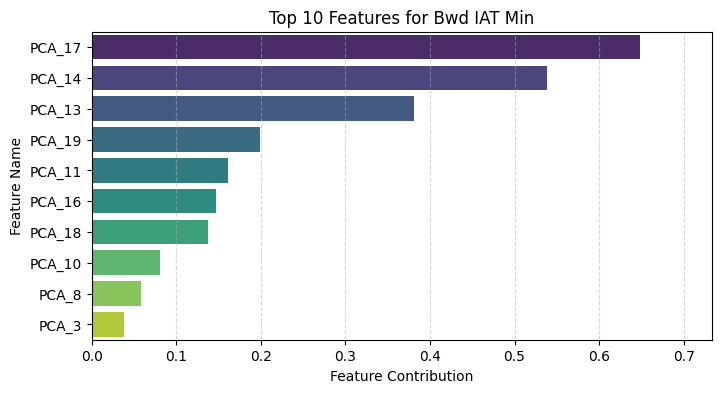


🔍 Top 10 Features Contributing to Bwd Avg Bulk Rate:
PCA_20    3.308722e-24
PCA_18    9.693523e-27
PCA_19    8.077936e-28
PCA_1     0.000000e+00
PCA_4     0.000000e+00
PCA_3     0.000000e+00
PCA_2     0.000000e+00
PCA_5     0.000000e+00
PCA_9     0.000000e+00
PCA_6     0.000000e+00
Name: Bwd Avg Bulk Rate, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


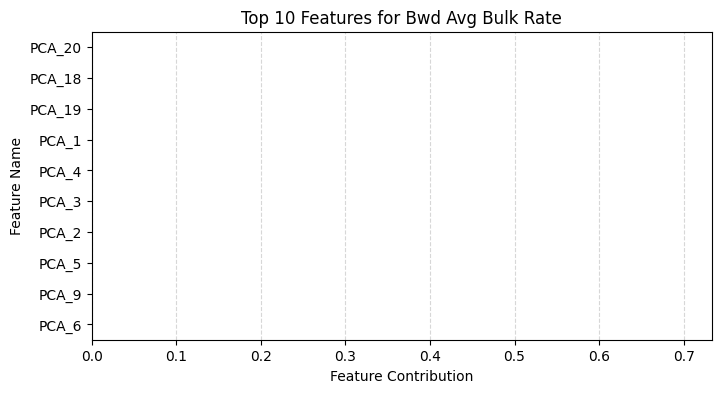


🔍 Top 10 Features Contributing to Idle Std:
PCA_16    0.420516
PCA_13    0.417263
PCA_5     0.288063
PCA_12    0.191991
PCA_19    0.153269
PCA_11    0.152616
PCA_3     0.104665
PCA_2     0.058776
PCA_7     0.052846
PCA_1     0.048414
Name: Idle Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


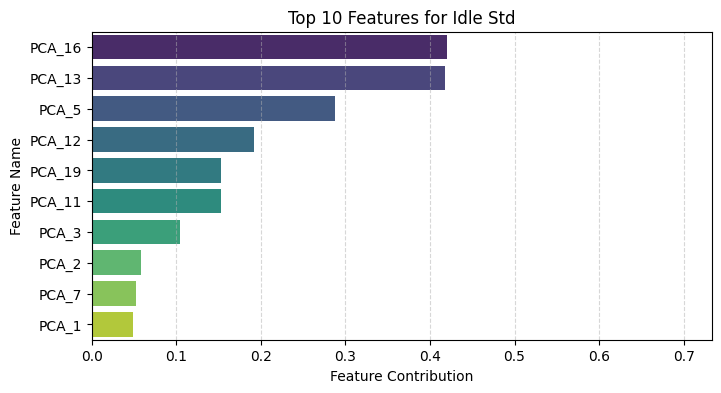


🔍 Top 10 Features Contributing to Active Max:
PCA_6     0.313619
PCA_7     0.221720
PCA_16    0.205762
PCA_9     0.201308
PCA_8     0.165676
PCA_10    0.157116
PCA_13    0.129995
PCA_1     0.125045
PCA_4     0.114932
PCA_15    0.098447
Name: Active Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


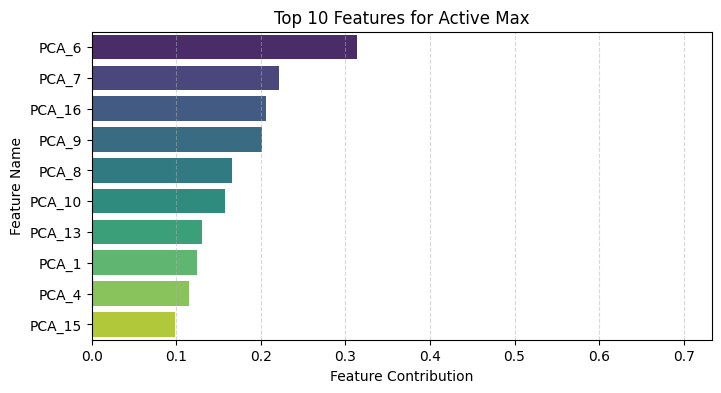


🔍 Top 10 Features Contributing to CWE Flag Count:
PCA_20    2.524355e-29
PCA_18    6.162976e-32
PCA_17    4.930381e-32
PCA_19    1.540744e-32
PCA_14    5.777790e-34
PCA_3     0.000000e+00
PCA_2     0.000000e+00
PCA_1     0.000000e+00
PCA_4     0.000000e+00
PCA_5     0.000000e+00
Name: CWE Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


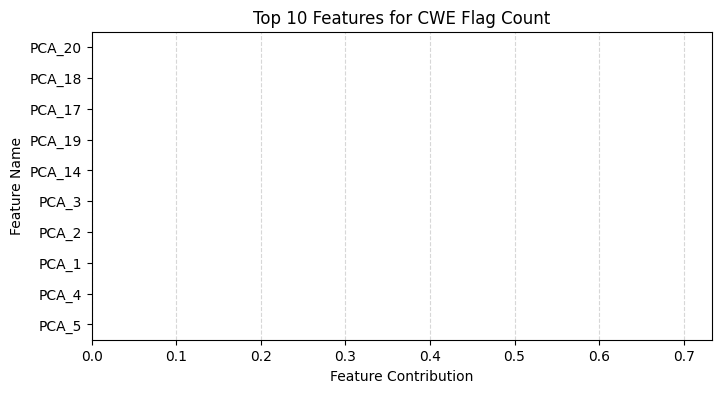


🔍 Top 10 Features Contributing to Active Mean:
PCA_6     0.323584
PCA_7     0.230012
PCA_9     0.221350
PCA_10    0.189327
PCA_12    0.180773
PCA_8     0.177139
PCA_1     0.117105
PCA_4     0.110207
PCA_5     0.081661
PCA_3     0.049566
Name: Active Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


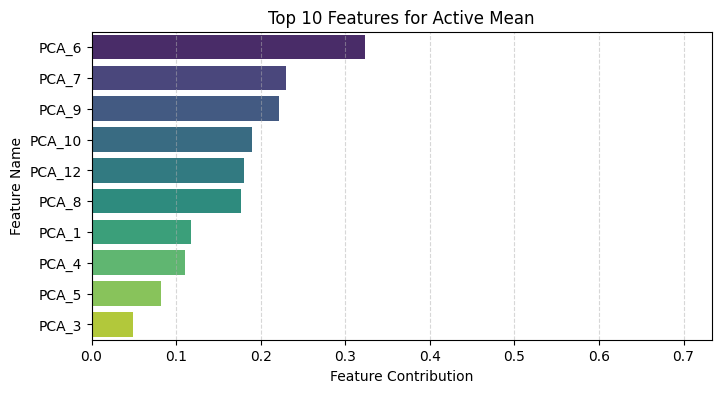


🔍 Top 10 Features Contributing to Fwd IAT Total:
PCA_5     0.269068
PCA_4     0.226223
PCA_8     0.146066
PCA_12    0.128168
PCA_1     0.119129
PCA_2     0.103582
PCA_13    0.099576
PCA_18    0.094040
PCA_3     0.085089
PCA_15    0.084968
Name: Fwd IAT Total, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


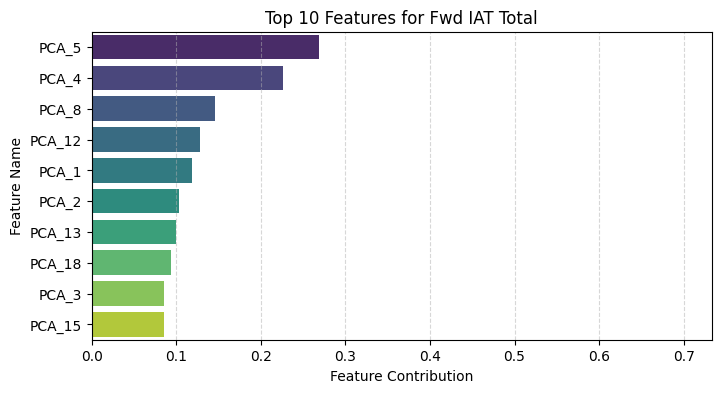


🔍 Top 10 Features Contributing to Packet Length Std:
PCA_1     0.247327
PCA_9     0.117096
PCA_4     0.109282
PCA_6     0.080258
PCA_3     0.073413
PCA_19    0.064845
PCA_5     0.050322
PCA_8     0.039025
PCA_17    0.030640
PCA_10    0.024470
Name: Packet Length Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


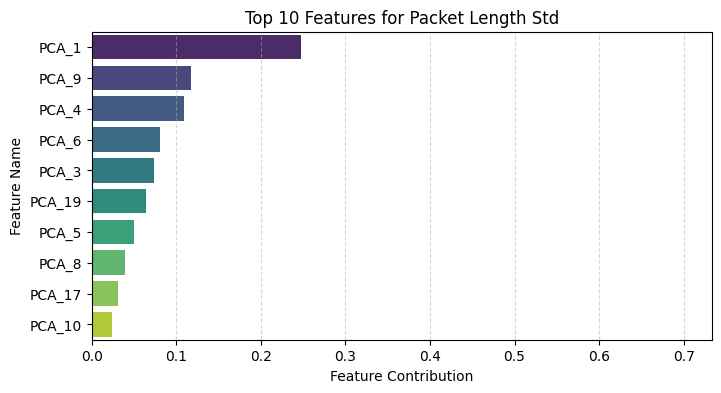


🔍 Top 10 Features Contributing to Fwd Packets Length Total:
PCA_8     0.270773
PCA_2     0.223205
PCA_3     0.150745
PCA_10    0.117437
PCA_9     0.111289
PCA_6     0.109203
PCA_1     0.063884
PCA_11    0.061139
PCA_7     0.032846
PCA_12    0.032739
Name: Fwd Packets Length Total, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


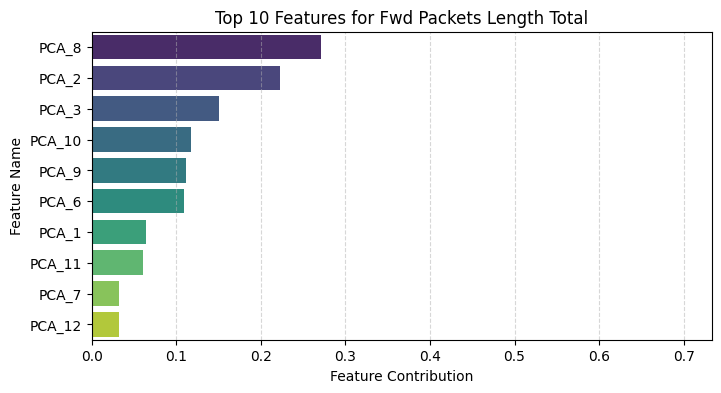


🔍 Top 10 Features Contributing to Packet Length Mean:
PCA_1     0.241352
PCA_4     0.156053
PCA_16    0.120463
PCA_13    0.091691
PCA_11    0.078297
PCA_3     0.067739
PCA_5     0.057407
PCA_10    0.040676
PCA_12    0.039346
PCA_2     0.036947
Name: Packet Length Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


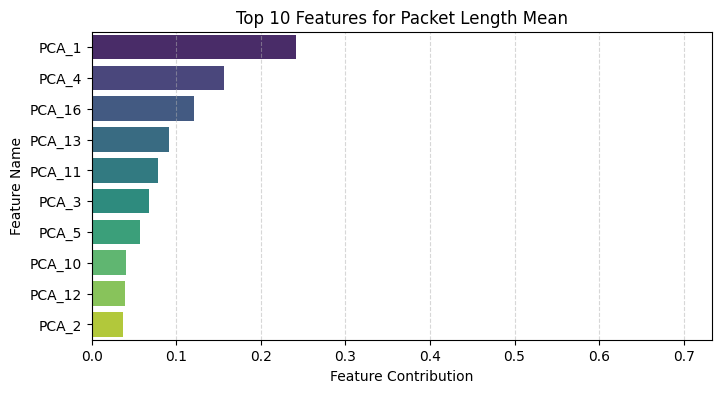


🔍 Top 10 Features Contributing to Flow IAT Min:
PCA_10    0.453011
PCA_18    0.356687
PCA_12    0.329441
PCA_11    0.323577
PCA_17    0.127147
PCA_19    0.124545
PCA_9     0.109611
PCA_8     0.104998
PCA_6     0.084827
PCA_5     0.075848
Name: Flow IAT Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


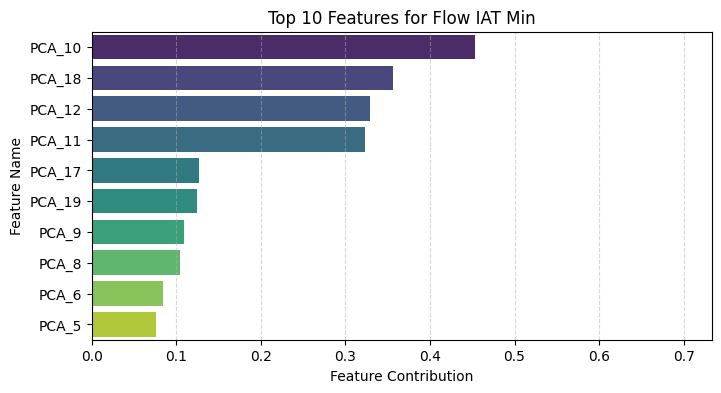


🔍 Top 10 Features Contributing to Flow IAT Std:
PCA_3     0.257364
PCA_2     0.168371
PCA_11    0.085943
PCA_10    0.085782
PCA_12    0.084338
PCA_13    0.083707
PCA_16    0.060475
PCA_4     0.053245
PCA_18    0.046491
PCA_5     0.036567
Name: Flow IAT Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


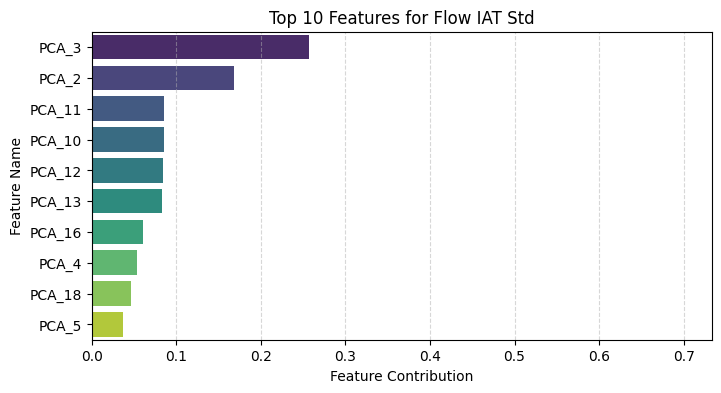


🔍 Top 10 Features Contributing to Packet Length Max:
PCA_1     0.258633
PCA_19    0.139163
PCA_16    0.124534
PCA_14    0.086873
PCA_13    0.066644
PCA_5     0.057452
PCA_3     0.052924
PCA_4     0.048813
PCA_18    0.045507
PCA_11    0.043100
Name: Packet Length Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


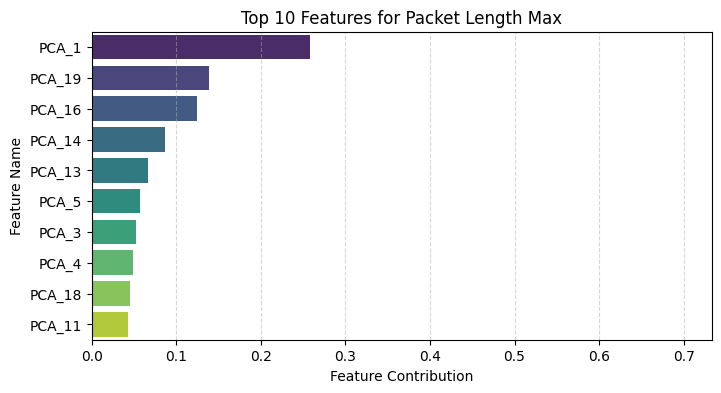


🔍 Top 10 Features Contributing to Init Bwd Win Byts:
PCA_19    0.276457
PCA_11    0.267295
PCA_5     0.263606
PCA_14    0.247294
PCA_16    0.220527
PCA_9     0.159449
PCA_4     0.123047
PCA_10    0.120584
PCA_1     0.117504
PCA_6     0.115349
Name: Init Bwd Win Byts, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


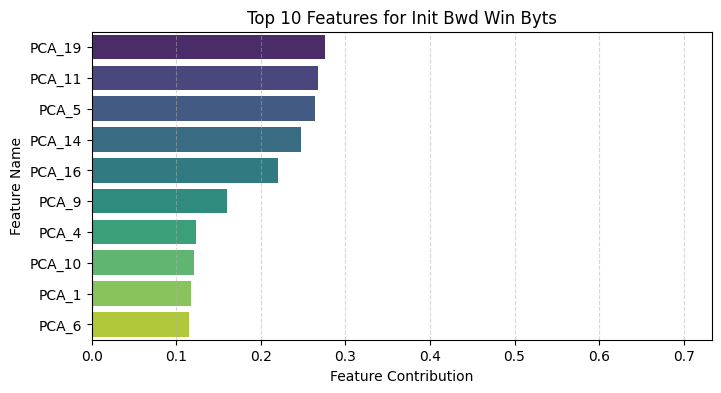


🔍 Top 10 Features Contributing to Bwd URG Flags:
PCA_20    6.617075e-30
PCA_18    4.727229e-33
PCA_17    3.747604e-33
PCA_19    1.028218e-33
PCA_14    5.640505e-35
PCA_3     0.000000e+00
PCA_2     0.000000e+00
PCA_1     0.000000e+00
PCA_4     0.000000e+00
PCA_5     0.000000e+00
Name: Bwd URG Flags, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


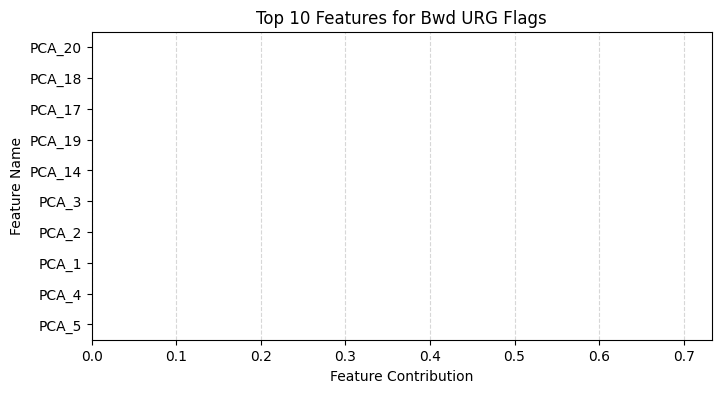


🔍 Top 10 Features Contributing to Fwd Avg Packets/Bulk:
PCA_20    3.915502e-30
PCA_18    2.797229e-33
PCA_17    2.217559e-33
PCA_19    6.084247e-34
PCA_14    3.337640e-35
PCA_3     0.000000e+00
PCA_2     0.000000e+00
PCA_1     0.000000e+00
PCA_4     0.000000e+00
PCA_5     0.000000e+00
Name: Fwd Avg Packets/Bulk, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


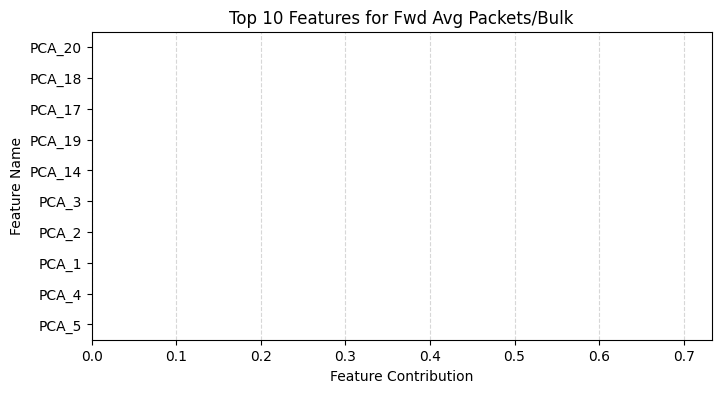


🔍 Top 10 Features Contributing to Bwd Packets Length Total:
PCA_8     0.341769
PCA_9     0.284294
PCA_6     0.234699
PCA_7     0.145974
PCA_10    0.128728
PCA_19    0.128687
PCA_2     0.124711
PCA_11    0.094320
PCA_3     0.089651
PCA_5     0.074720
Name: Bwd Packets Length Total, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


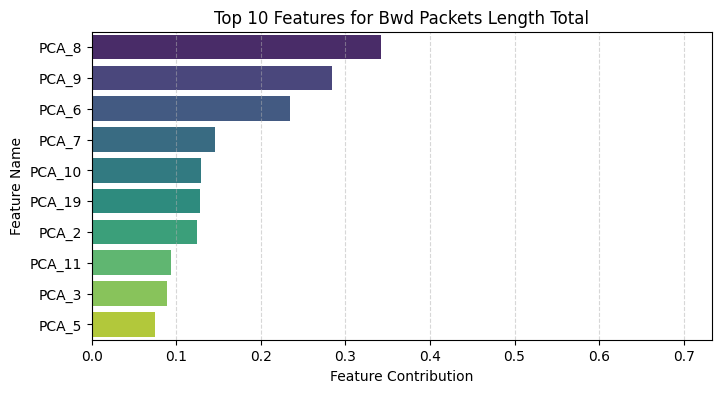


🔍 Top 10 Features Contributing to Fwd Packet Length Mean:
PCA_19    0.280859
PCA_1     0.242281
PCA_11    0.107051
PCA_18    0.105164
PCA_4     0.103847
PCA_5     0.081590
PCA_10    0.066949
PCA_9     0.064680
PCA_3     0.063176
PCA_16    0.059833
Name: Fwd Packet Length Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


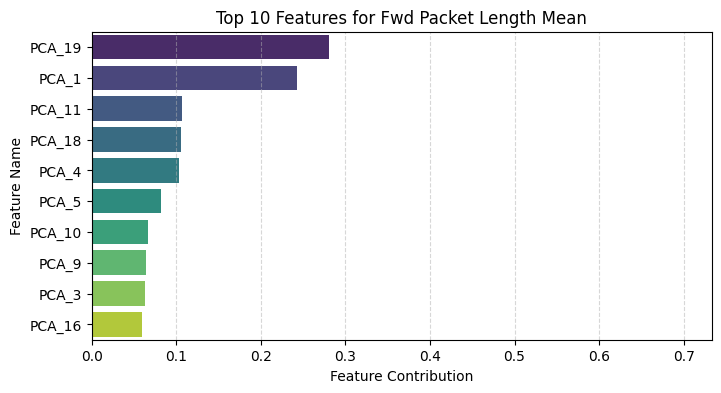


🔍 Top 10 Features Contributing to Fwd Packet Length Std:
PCA_1     0.233016
PCA_4     0.153532
PCA_19    0.102282
PCA_6     0.080350
PCA_9     0.076084
PCA_3     0.075741
PCA_16    0.067813
PCA_2     0.056422
PCA_8     0.051027
PCA_13    0.034203
Name: Fwd Packet Length Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


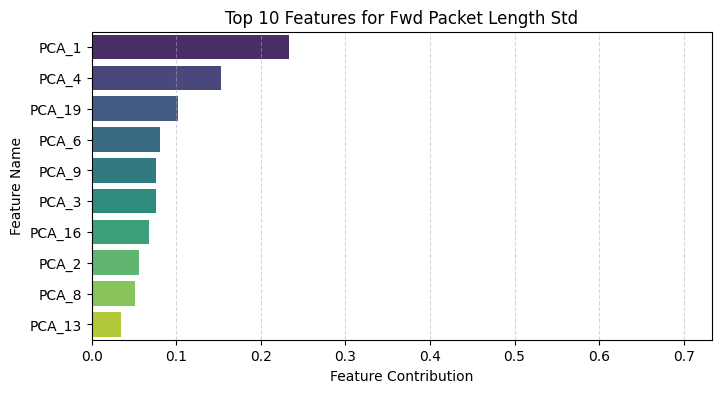


🔍 Top 10 Features Contributing to Idle Mean:
PCA_3     0.253695
PCA_2     0.176250
PCA_10    0.089118
PCA_8     0.068744
PCA_1     0.062432
PCA_11    0.058436
PCA_18    0.057811
PCA_14    0.050856
PCA_7     0.045741
PCA_6     0.041493
Name: Idle Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


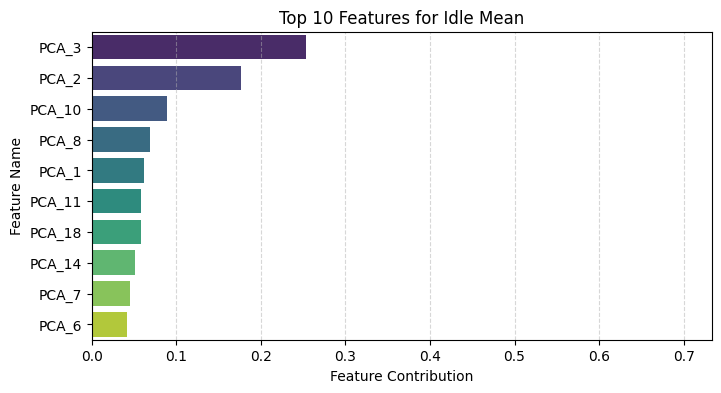


🔍 Top 10 Features Contributing to Fwd IAT Std:
PCA_5     0.266904
PCA_11    0.263916
PCA_13    0.242507
PCA_14    0.188011
PCA_3     0.173340
PCA_10    0.163131
PCA_17    0.162060
PCA_19    0.121654
PCA_2     0.108362
PCA_12    0.103873
Name: Fwd IAT Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


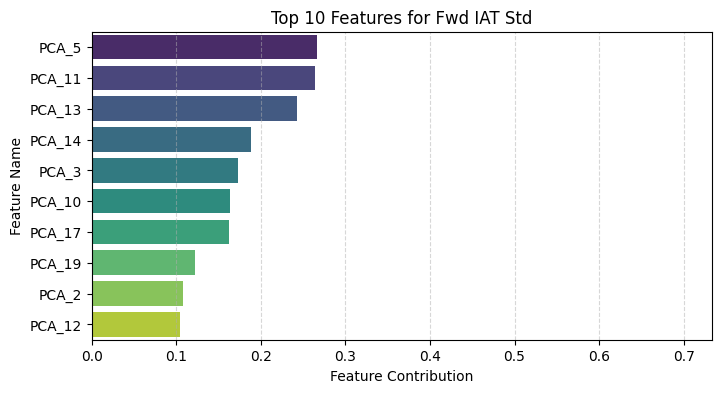


🔍 Top 10 Features Contributing to Active Std:
PCA_16    0.605311
PCA_13    0.419845
PCA_14    0.374187
PCA_15    0.280671
PCA_12    0.237236
PCA_11    0.090499
PCA_5     0.065382
PCA_1     0.057157
PCA_6     0.056270
PCA_10    0.054091
Name: Active Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


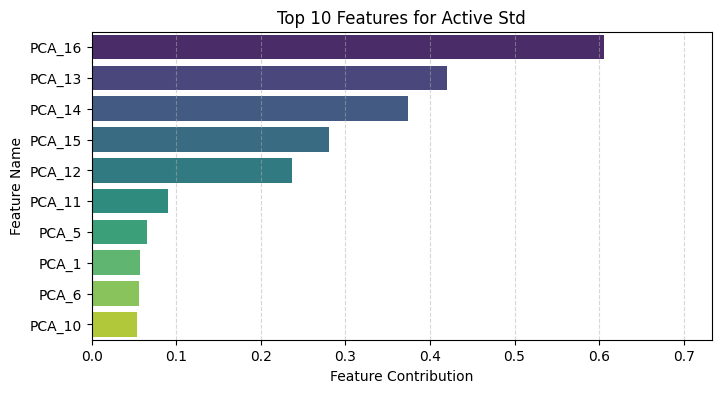


🔍 Top 10 Features Contributing to FIN Flag Count:
PCA_12    0.504643
PCA_13    0.335089
PCA_14    0.227191
PCA_18    0.226553
PCA_6     0.221496
PCA_16    0.215771
PCA_15    0.158849
PCA_9     0.107903
PCA_11    0.105754
PCA_10    0.075027
Name: FIN Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


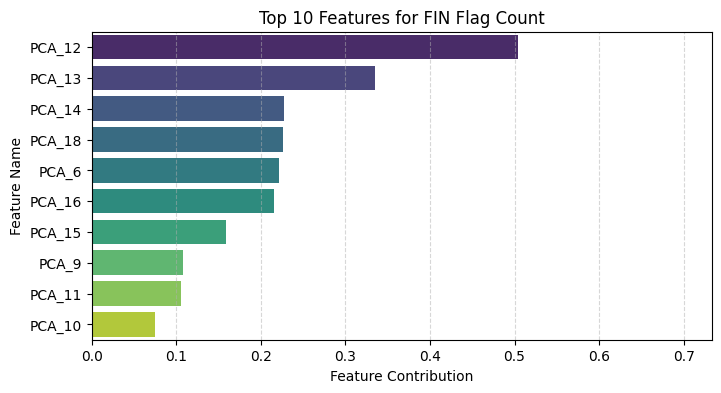


🔍 Top 10 Features Contributing to Bwd Packet Length Std:
PCA_11    0.206124
PCA_9     0.190840
PCA_1     0.190414
PCA_6     0.174574
PCA_5     0.151531
PCA_10    0.120471
PCA_14    0.109444
PCA_4     0.097428
PCA_12    0.073459
PCA_8     0.063318
Name: Bwd Packet Length Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


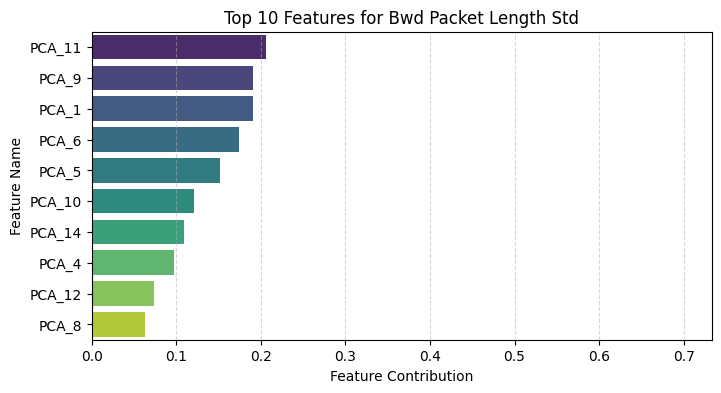


🔍 Top 10 Features Contributing to Avg Bwd Segment Size:
PCA_19    0.311892
PCA_4     0.201413
PCA_1     0.186423
PCA_5     0.173142
PCA_11    0.154630
PCA_18    0.134664
PCA_6     0.127000
PCA_8     0.097958
PCA_17    0.078021
PCA_10    0.076294
Name: Avg Bwd Segment Size, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


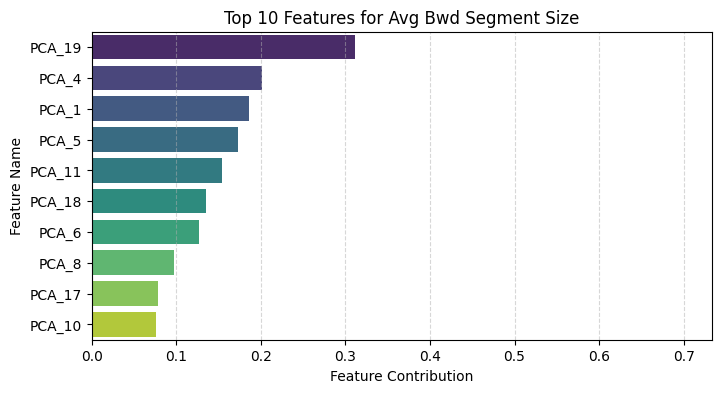


🔍 Top 10 Features Contributing to Fwd Packet Length Min:
PCA_19    0.371411
PCA_4     0.317566
PCA_6     0.131334
PCA_18    0.126671
PCA_1     0.103749
PCA_17    0.097994
PCA_2     0.088608
PCA_10    0.086203
PCA_7     0.082779
PCA_16    0.079870
Name: Fwd Packet Length Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


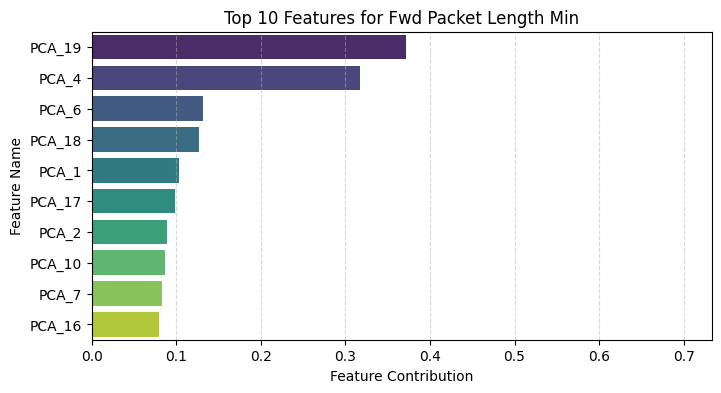


🔍 Top 10 Features Contributing to Bwd IAT Std:
PCA_3     0.224573
PCA_5     0.196290
PCA_11    0.178271
PCA_2     0.160882
PCA_12    0.079740
PCA_10    0.078966
PCA_19    0.077359
PCA_18    0.076797
PCA_1     0.067003
PCA_17    0.066741
Name: Bwd IAT Std, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


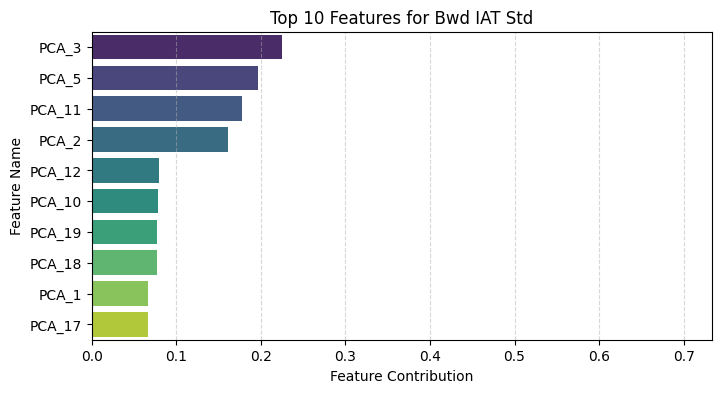


🔍 Top 10 Features Contributing to Subflow Bwd Bytes:
PCA_8     0.341769
PCA_9     0.284294
PCA_6     0.234699
PCA_7     0.145974
PCA_10    0.128728
PCA_19    0.128687
PCA_2     0.124711
PCA_11    0.094320
PCA_3     0.089651
PCA_5     0.074720
Name: Subflow Bwd Bytes, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


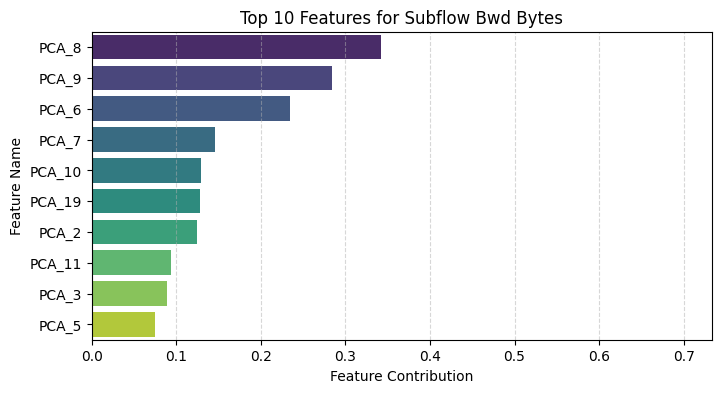


🔍 Top 10 Features Contributing to Fwd Avg Bytes/Bulk:
PCA_1     0.0
PCA_2     0.0
PCA_3     0.0
PCA_4     0.0
PCA_5     0.0
PCA_6     0.0
PCA_7     0.0
PCA_8     0.0
PCA_9     0.0
PCA_10    0.0
Name: Fwd Avg Bytes/Bulk, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


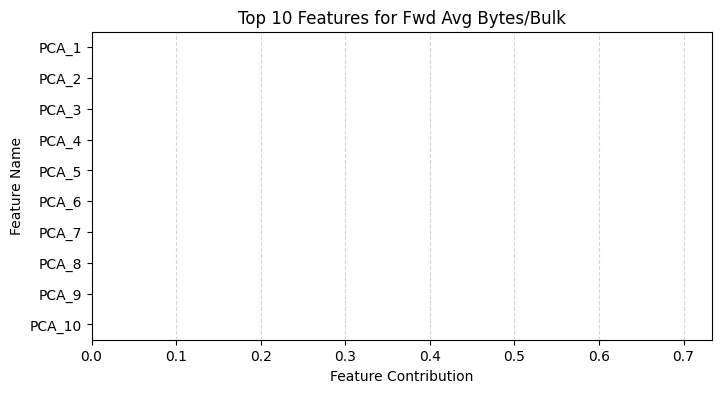


🔍 Top 10 Features Contributing to Fwd URG Flags:
PCA_1     0.0
PCA_2     0.0
PCA_3     0.0
PCA_4     0.0
PCA_5     0.0
PCA_6     0.0
PCA_7     0.0
PCA_8     0.0
PCA_9     0.0
PCA_10    0.0
Name: Fwd URG Flags, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


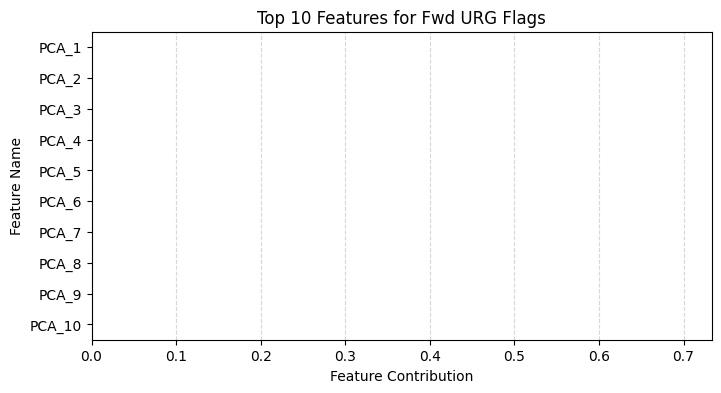


🔍 Top 10 Features Contributing to Avg Packet Size:
PCA_1     0.245514
PCA_4     0.141871
PCA_16    0.104044
PCA_13    0.081616
PCA_11    0.075354
PCA_3     0.070526
PCA_5     0.056849
PCA_10    0.038701
PCA_19    0.035918
PCA_12    0.034205
Name: Avg Packet Size, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


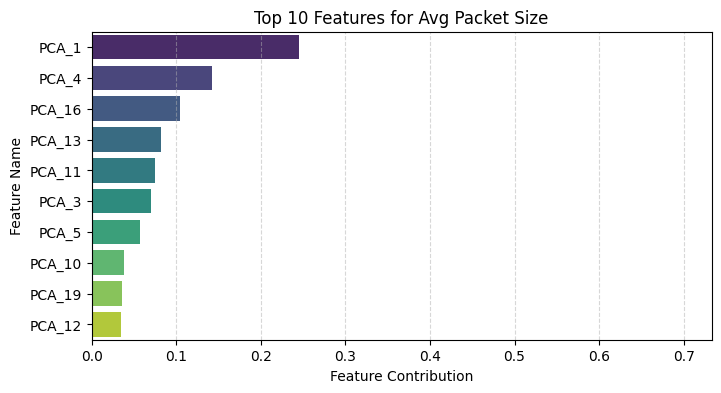


🔍 Top 10 Features Contributing to Flow Bytes/s:
PCA_20    0.631241
PCA_15    0.602946
PCA_7     0.273154
PCA_13    0.174395
PCA_14    0.152586
PCA_6     0.142196
PCA_18    0.141869
PCA_12    0.131831
PCA_16    0.121320
PCA_9     0.115771
Name: Flow Bytes/s, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


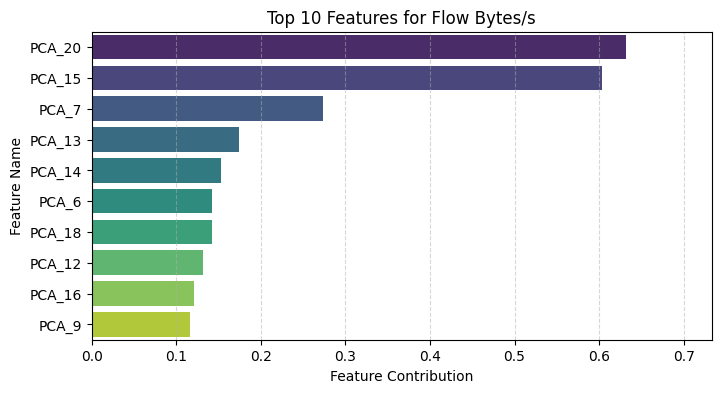


🔍 Top 10 Features Contributing to Bwd IAT Max:
PCA_3     0.215355
PCA_2     0.164747
PCA_5     0.133784
PCA_10    0.111495
PCA_11    0.107098
PCA_1     0.098826
PCA_19    0.084780
PCA_9     0.070586
PCA_12    0.064606
PCA_18    0.054857
Name: Bwd IAT Max, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


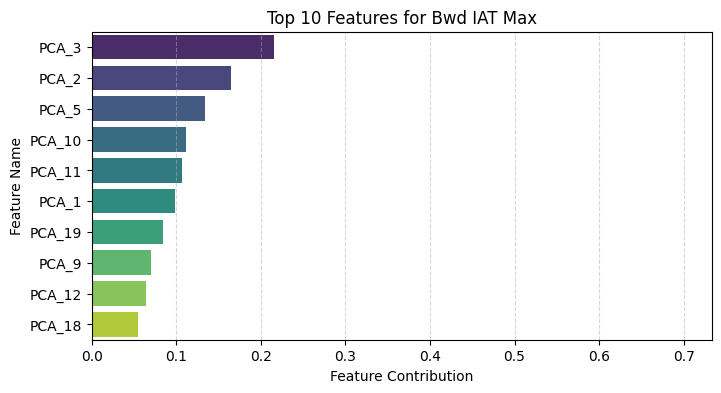


🔍 Top 10 Features Contributing to SYN Flag Count:
PCA_1     0.228543
PCA_4     0.168806
PCA_19    0.156215
PCA_16    0.123155
PCA_13    0.083114
PCA_14    0.081826
PCA_18    0.066306
PCA_11    0.064688
PCA_2     0.061476
PCA_3     0.061285
Name: SYN Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


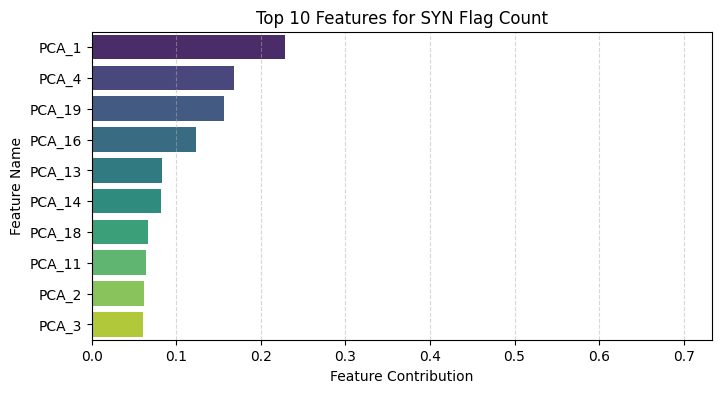


🔍 Top 10 Features Contributing to Fwd Act Data Pkts:
PCA_8     0.239027
PCA_2     0.225524
PCA_3     0.157953
PCA_9     0.147631
PCA_10    0.106155
PCA_6     0.104253
PCA_11    0.071386
PCA_19    0.069156
PCA_4     0.056906
PCA_1     0.048553
Name: Fwd Act Data Pkts, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


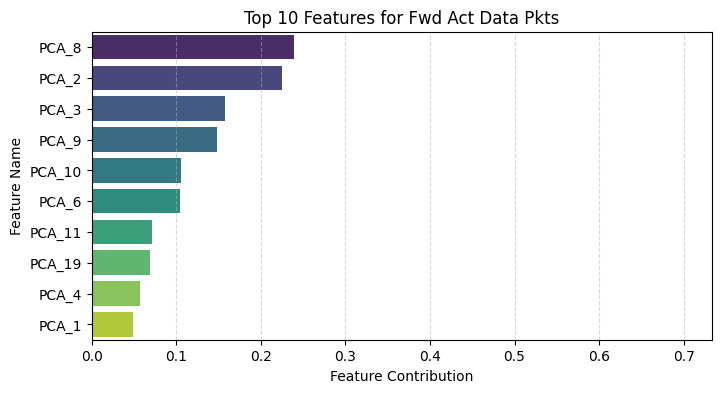


🔍 Top 10 Features Contributing to Fwd IAT Mean:
PCA_11    0.373635
PCA_10    0.239492
PCA_5     0.230373
PCA_3     0.159929
PCA_16    0.152317
PCA_13    0.145025
PCA_12    0.113063
PCA_17    0.109523
PCA_2     0.107428
PCA_19    0.100574
Name: Fwd IAT Mean, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


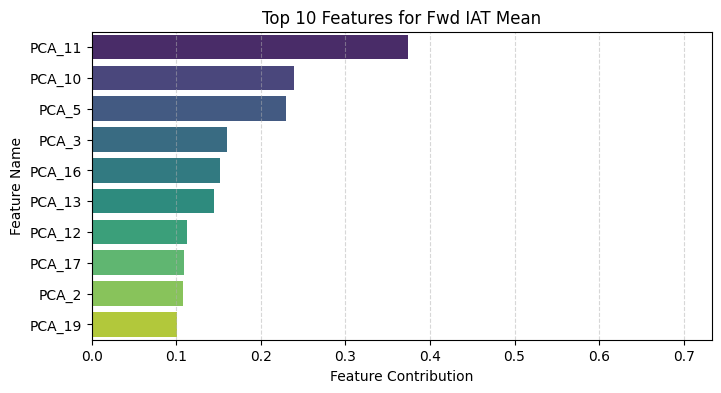


🔍 Top 10 Features Contributing to Total Fwd Packets:
PCA_2     0.255476
PCA_3     0.185535
PCA_4     0.093131
PCA_1     0.057703
PCA_9     0.047239
PCA_7     0.040286
PCA_19    0.036043
PCA_6     0.026880
PCA_14    0.018770
PCA_8     0.017938
Name: Total Fwd Packets, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


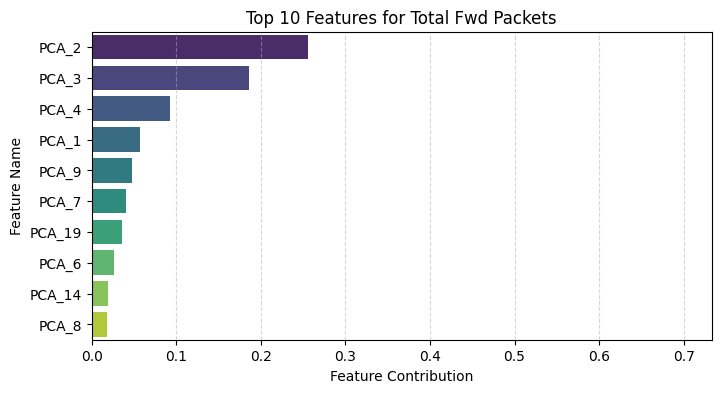


🔍 Top 10 Features Contributing to Idle Min:
PCA_3     0.240551
PCA_2     0.169884
PCA_5     0.097127
PCA_10    0.088625
PCA_8     0.081171
PCA_1     0.075665
PCA_16    0.068028
PCA_13    0.067613
PCA_18    0.063412
PCA_14    0.041914
Name: Idle Min, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


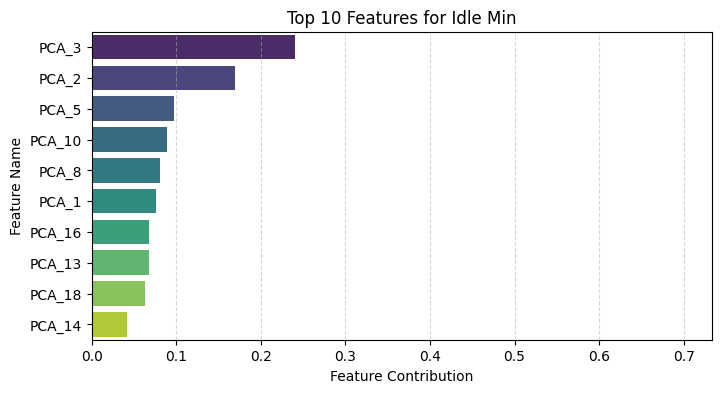


🔍 Top 10 Features Contributing to Bwd Header Length:
PCA_2     0.257691
PCA_3     0.183897
PCA_4     0.102712
PCA_1     0.051979
PCA_6     0.049185
PCA_7     0.044400
PCA_9     0.035615
PCA_19    0.028408
PCA_5     0.020327
PCA_16    0.015640
Name: Bwd Header Length, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


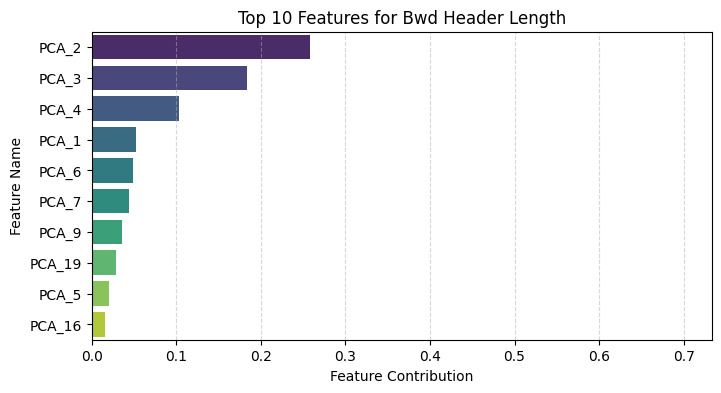


🔍 Top 10 Features Contributing to ECE Flag Count:
PCA_1     0.0
PCA_2     0.0
PCA_3     0.0
PCA_4     0.0
PCA_5     0.0
PCA_6     0.0
PCA_7     0.0
PCA_8     0.0
PCA_9     0.0
PCA_10    0.0
Name: ECE Flag Count, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


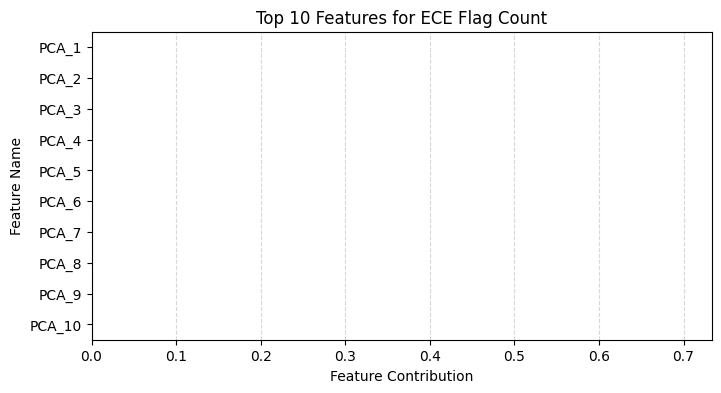


🔍 Top 10 Features Contributing to Flow Duration:
PCA_4     0.212094
PCA_5     0.173786
PCA_12    0.163042
PCA_2     0.152921
PCA_1     0.142876
PCA_18    0.131121
PCA_8     0.116277
PCA_15    0.102389
PCA_13    0.086891
PCA_7     0.080931
Name: Flow Duration, dtype: float64


<ipython-input-9-aad417b640c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


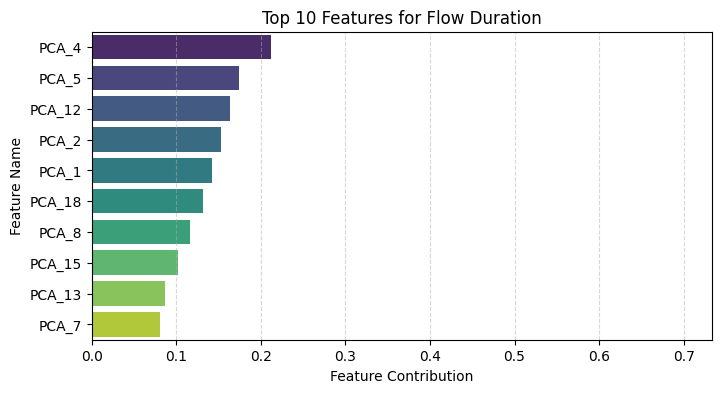

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set how many top features you want to display per PCA component
top_n = 10

# ✅ Find the maximum absolute contribution value across all components for consistent scaling
max_contribution = pca_loadings_df.abs().max().max()  # Maximum value in the entire DataFrame

# ✅ Loop through all PCA components
for pca_component in pca_loadings_df.columns:
    top_features = pca_loadings_df[pca_component].abs().sort_values(ascending=False).head(top_n)

    # ✅ Print the top contributing features
    print(f"\n🔍 Top {top_n} Features Contributing to {pca_component}:")
    print(top_features)

    # ✅ Plot the bar graph
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")

    plt.xlabel("Feature Contribution")
    plt.ylabel("Feature Name")
    plt.title(f"Top {top_n} Features for {pca_component}")

    plt.xlim(0, max_contribution)  # ✅ Set the same x-axis range for all plots
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    plt.show()  # Display the plot

In [ ]:
print("✅ Final y_test class distribution:")
print(y_test.value_counts())
print("Sample y_test vs y_pred:")
print(pd.DataFrame({"Actual": y_test_trimmed[:10].values, "Predicted": y_pred[:10]}))
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Explained Variance by PCA: {explained_variance:.4f}")

print("✅ Check unique values in y_test:")
print(y_test.unique())

print("✅ Check prediction distribution for a model:")
print(pd.Series(y_pred).value_counts())

✅ Final y_test class distribution:
Label
0    11272
1    11272
Name: count, dtype: int64
Sample y_test vs y_pred:
   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       1          0
4       1          0
5       1          0
6       1          0
7       1          0
8       1          0
9       1          0
Explained Variance by PCA: 0.9634
✅ Check unique values in y_test:
[0 1]
✅ Check prediction distribution for a model:
0    17109
1     5435
Name: count, dtype: int64


In [ ]:
#XAI_INTEGRATION

In [ ]:
!pip install shap

In [ ]:
import pandas as pd

print("✅ y_train class distribution:")
print(pd.Series(y_train).value_counts())

print("\n✅ y_test class distribution:")
print(pd.Series(y_test).value_counts())


✅ y_train class distribution:
1    579533
0     44271
Name: count, dtype: int64

✅ y_test class distribution:
Label
0    11272
1    11272
Name: count, dtype: int64


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

📌 SHAP Values Shape: (2000, 20)
📌 X_test_sample Shape: (2000, 20)
🔍 PCA Feature Explanation: PCA_1 (-0.05); PCA_17 (0.04); PCA_5 (-0.03); PCA_16 (0.02); PCA_11 (-0.02)


<ipython-input-8-efa9cd154ef7>:54: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="bar")


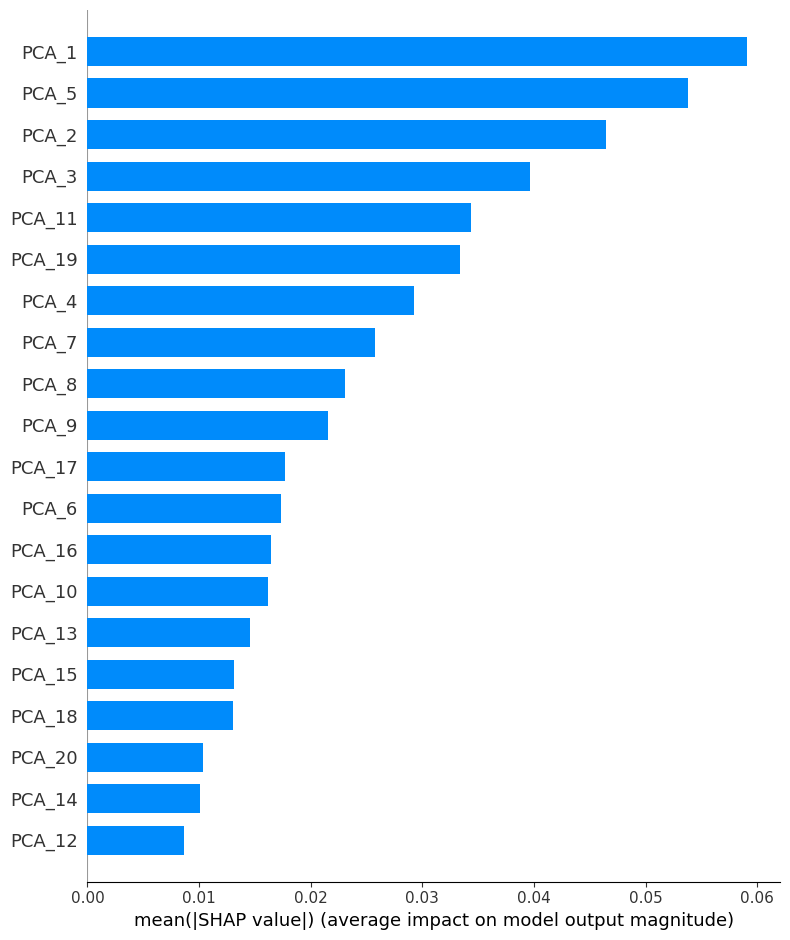

<ipython-input-8-efa9cd154ef7>:56: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="dot")


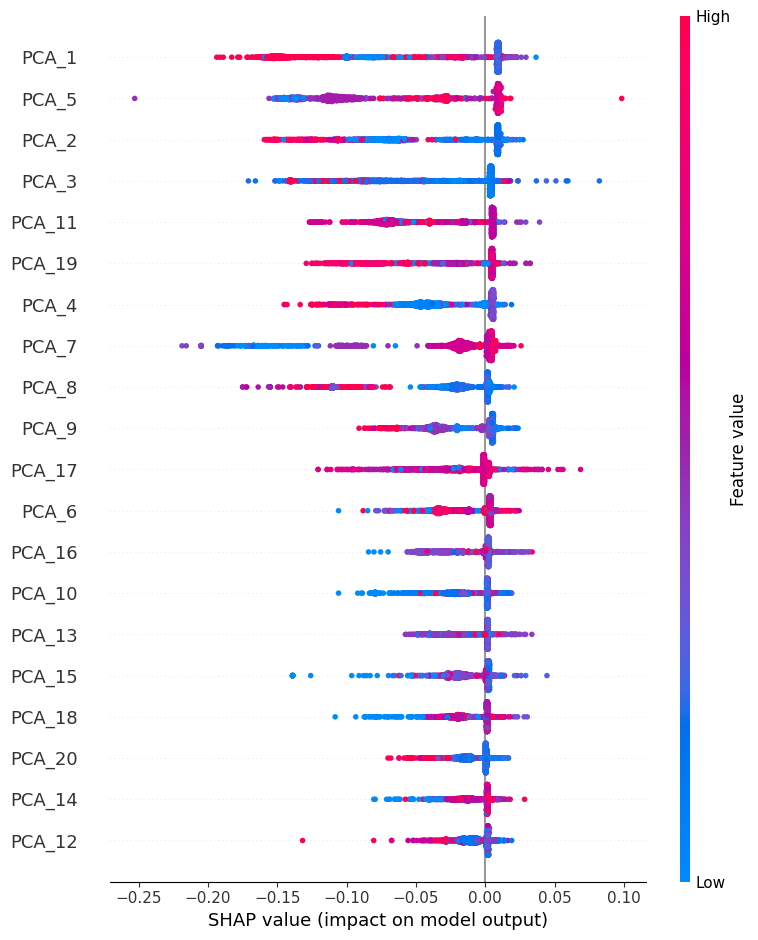

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# ✅ Select Random Forest for SHAP explainability
selected_model = models["Random Forest"]
explainer = shap.TreeExplainer(selected_model)

# ✅ Drop 'Source IP' before SHAP computation
X_test_pca_no_ip = X_test_final.drop(columns=['Source IP'], errors='ignore')

# ✅ Sample 2000 rows from test set
sample_size = min(2000, len(X_test_pca_no_ip))
sample_indices = np.random.choice(X_test_pca_no_ip.index, sample_size, replace=False)
X_test_sample = X_test_pca_no_ip.loc[sample_indices]

# ✅ Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# ✅ Fix SHAP indexing
if isinstance(shap_values, list):
    shap_values_fixed = shap_values[-1]  # Take the anomaly class
else:
    shap_values_fixed = shap_values

# ✅ Ensure it's a NumPy array
shap_values_fixed = np.array(shap_values_fixed)

# ✅ If 3D (samples, features, classes), take anomaly class
if shap_values_fixed.ndim == 3:
    shap_values_fixed = shap_values_fixed[:, :, -1]

# ✅ Print shapes
print("📌 SHAP Values Shape:", shap_values_fixed.shape)
print("📌 X_test_sample Shape:", X_test_sample.shape)

# ✅ Function to generate PCA explanations
def get_pca_explanation(ip_index):
    feature_contributions = shap_values_fixed[ip_index]
    feature_contributions = np.array(feature_contributions).flatten()
    top_features = sorted(
        zip(X_test_sample.columns, feature_contributions),
        key=lambda x: abs(x[1]), reverse=True
    )[:5]
    pca_explanation = [f"{pca_component} ({value:.2f})" for pca_component, value in top_features]
    return "; ".join(pca_explanation)

# ✅ Explain first anomaly
print("🔍 PCA Feature Explanation:", get_pca_explanation(0))

# ✅ Summary Plot (Overall importance)
shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="bar")

shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="dot")

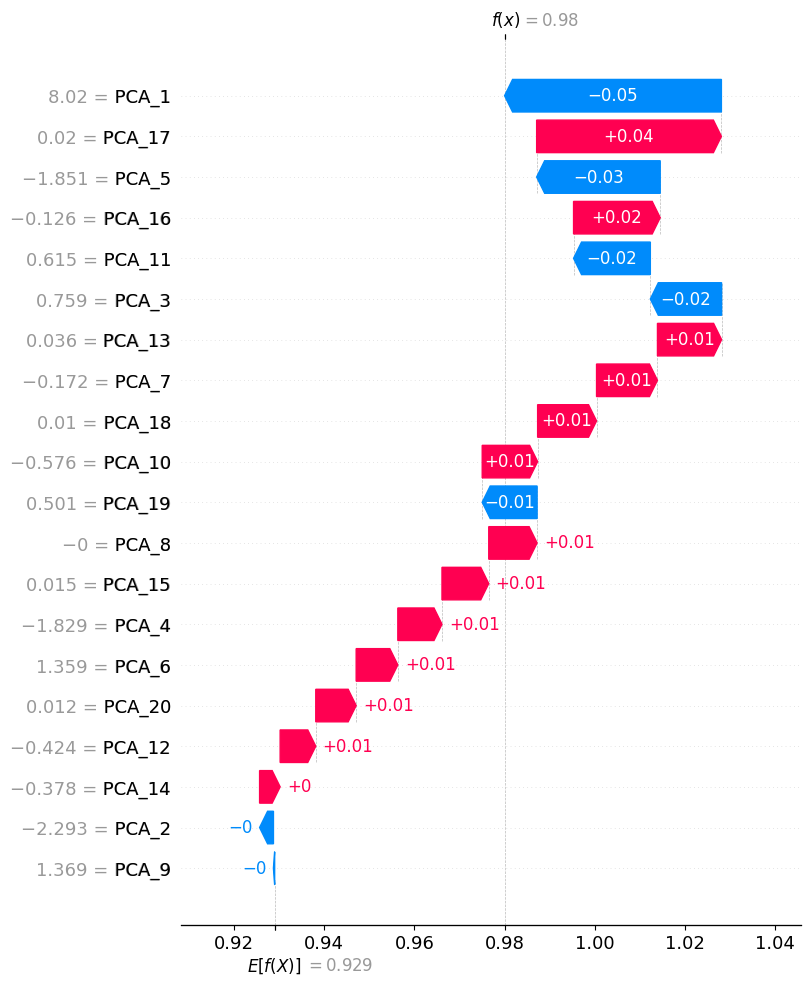

In [ ]:
ip_index = 0  # or whichever row you want to explain

shap_value = shap.Explanation(
    values=shap_values_fixed[ip_index],
    base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
    data=X_test_sample.iloc[ip_index],
    feature_names=X_test_sample.columns
)

# ✅ Show all PCA components
shap.plots.waterfall(shap_value, max_display=X_test_sample.shape[1])
plt.show()

In [ ]:
print("📌 SHAP Values Fixed Shape:", shap_values_fixed.shape)
print("📌 PCA Loadings Shape:", pca_loadings.shape)

NameError: name 'shap_values_fixed' is not defined

In [ ]:
import pandas as pd
import numpy as np

def get_top_features_per_pca(pca, feature_names, top_k=5):
    """
    Returns a dictionary with PCA component names as keys and the top contributing features as values.
    """
    pca_components = pca.components_
    top_features_dict = {}

    for i, component in enumerate(pca_components):
        # Get indices of top absolute values (strongest contributions)
        top_indices = np.argsort(np.abs(component))[::-1][:top_k]
        top_features = [feature_names[j] for j in top_indices]

        top_features_dict[f'PCA{i+1}'] = top_features

    return top_features_dict
# Assuming `pca` is your fitted PCA model
# and `original_feature_names` is a list of the features *before* PCA

top_features_per_component = get_top_features_per_pca(pca, original_feature_names, top_k=10)

# Print them out
for comp, features in top_features_per_component.items():
    print(f"\n🔷 {comp}")
    for feat in features:
        print(f" - {feat}")


🔷 PCA1
 - Packet Length Max
 - Fwd Packet Length Max
 - Packet Length Std
 - Avg Packet Size
 - Packet Length Variance
 - Fwd Packet Length Mean
 - Avg Fwd Segment Size
 - Packet Length Mean
 - Fwd Packet Length Std
 - SYN Flag Count

🔷 PCA2
 - Bwd Header Length
 - Total Backward Packets
 - Subflow Bwd Packets
 - Total Fwd Packets
 - Subflow Fwd Packets
 - Fwd Header Length
 - Fwd Act Data Pkts
 - Fwd Packets Length Total
 - Subflow Fwd Bytes
 - Idle Mean

🔷 PCA3
 - Flow IAT Max
 - Flow IAT Std
 - Idle Max
 - Idle Mean
 - Idle Min
 - Bwd IAT Std
 - Bwd IAT Max
 - Bwd IAT Mean
 - Flow IAT Mean
 - Subflow Fwd Packets

🔷 PCA4
 - Packet Length Min
 - Bwd Packet Length Min
 - Protocol
 - Fwd Packet Length Min
 - Fwd IAT Total
 - Flow Duration
 - Avg Bwd Segment Size
 - Bwd Packet Length Mean
 - SYN Flag Count
 - Bwd IAT Total

🔷 PCA5
 - Fwd IAT Max
 - Down/Up Ratio
 - Idle Std
 - Fwd IAT Total
 - Fwd IAT Std
 - Init Bwd Win Byts
 - Fwd IAT Mean
 - Bwd IAT Mean
 - Bwd IAT Std
 - Flow Durati

In [ ]:
#BLOCKCHAIN_INTEGRATION

In [ ]:
!pip install web3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.6/306.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.7 MB/s eta 0:00:00


In [ ]:
!pip install web3 python-dotenv

In [ ]:
import os
from web3 import Web3
from getpass import getpass  # Securely enter private key

# ✅ Use a public Sepolia RPC URL
RPC_URL = "https://ethereum-sepolia-rpc.publicnode.com"
web3 = Web3(Web3.HTTPProvider(RPC_URL))

# ✅ Check connection
if web3.is_connected():
    print("✅ Connected to Ethereum Sepolia Testnet")
else:
    print("❌ Connection failed!")

# ✅ Enter private key securely
private_key = getpass("Enter your private key securely: ")

if private_key:
    # ✅ Derive Ethereum address from private key
    account = web3.eth.account.from_key(private_key)
    your_address = account.address  # Extract address
    print(f"✅ Ethereum Address Loaded: {your_address}")

    # ✅ Set the default account
    web3.eth.default_account = your_address
else:
    print("❌ Error: Private key is missing!")
    exit()  # Exit the script if the private key is missing

✅ Connected to Ethereum Sepolia Testnet
Enter your private key securely: ··········
✅ Ethereum Address Loaded: 0xb477fE56326eaaF1b6C5828c3474aCBdAD15edB7


In [ ]:
# Replace with your deployed contract address
CONTRACT_ADDRESS = "0x540cC923912B3B24BE7287B2d4eeF92A3c127C30"

# Contract ABI (Copy from Remix after deploying)
CONTRACT_ABI = [
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "addToBlacklist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "addToWhitelist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"stateMutability": "nonpayable",
		"type": "constructor"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "reason",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			}
		],
		"name": "AnomalyDetected",
		"type": "event"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "listType",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "IPAdded",
		"type": "event"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "listType",
				"type": "string"
			}
		],
		"name": "IPRemoved",
		"type": "event"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "removeFromBlacklist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "removeFromWhitelist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "triggerTestAnomaly",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "getAnomalyExplanation",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getBlacklistedIPs",
		"outputs": [
			{
				"internalType": "string[]",
				"name": "",
				"type": "string[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getWhitelistedIPs",
		"outputs": [
			{
				"internalType": "string[]",
				"name": "",
				"type": "string[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "isBlacklisted",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "isWhitelisted",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "owner",
		"outputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]

In [ ]:
contract = web3.eth.contract(address=CONTRACT_ADDRESS, abi=CONTRACT_ABI)

print("✅ Contract loaded successfully!")

✅ Contract loaded successfully!


In [ ]:
print(f"✅ Contract Address: {contract.address}")

✅ Contract Address: 0x540cC923912B3B24BE7287B2d4eeF92A3c127C30


In [ ]:
user_address = "0x540cC923912B3B24BE7287B2d4eeF92A3c127C30"  # Replace with an actual address
is_blacklisted = contract.functions.isBlacklisted(user_address).call()

print(f"🚀 Is {user_address} blacklisted? {is_blacklisted}")

🚀 Is 0x540cC923912B3B24BE7287B2d4eeF92A3c127C30 blacklisted? False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ✅ Step 1: Debugging and Validation (From First Block)
print(train_df.groupby("Source IP")["Label"].nunique().sort_values(ascending=False).head(10))

# Ensure `y_pred_labels` exists
if "y_pred_labels" not in locals():
    print("`y_pred_labels` is not defined. Predicting labels again...")
    y_pred_labels = model.predict(X_test_pca)  # Predict labels again
    print("Generated `y_pred_labels`:", y_pred_labels.shape)

# Ensure `y_pred_labels` has the correct shape
if len(y_pred_labels) != len(test_source_ips):
    print("Mismatch detected! Fixing `y_pred_labels`...")
    y_pred_labels = model.predict(X_test_pca)  # Ensure correct size
    print("Updated Predicted Labels shape:", y_pred_labels.shape)

# Print explained variance by PCA
print(f"Explained Variance by PCA: {np.sum(pca.explained_variance_ratio_):.4f}")

<ipython-input-27-7f433aaf53ae>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby("Source IP")["Label"].nunique().sort_values(ascending=False).head(10))


Source IP
192.168.3.107    2
192.168.3.116    2
192.168.3.141    2
192.168.3.172    2
8.6.0.175        2
192.168.3.57     2
192.168.3.239    2
192.168.3.34     2
192.168.3.254    2
192.168.3.91     2
Name: Label, dtype: int64
`y_pred_labels` is not defined. Predicting labels again...
Generated `y_pred_labels`: (157243,)
Explained Variance by PCA: 0.9634


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ✅ Step 1: Ensure Predictions Exist
y_pred_labels = model.predict(X_test_pca)  # Get predicted labels (1 for anomaly, 0 for normal)

# Since Random Forest does not support probability estimation, use predicted labels as scores
print("Model does not support probability estimation. Using predicted labels as scores.")

# Debugging: Print Shape of Predictions
print(f"y_pred_labels shape: {y_pred_labels.shape}")

# ✅ Step 2: Ensure Anomaly Scores are 1D
anomaly_scores = np.array(y_pred_labels).flatten()  # Convert to 1D array

# Debugging: Print Shape of Anomaly Scores
print(f"anomaly_scores shape after flattening: {anomaly_scores.shape}")

# ✅ Step 3: DataFrame Creation
scores_df = pd.DataFrame({
    "IP": np.array(test_source_ips).flatten(),  # Ensure IPs are also 1D
    "Anomaly_Score": anomaly_scores,
    "Predicted_Label": y_pred_labels
})

# Debugging: Print Head of DataFrame
print(scores_df.head())

# 🔹 Fix: Ensure each IP has a single label
scores_df["Final_Label"] = scores_df.groupby("IP", observed=True)["Predicted_Label"].transform(lambda x: -1 if -1 in x.values else 1)
scores_df.drop(columns=["Predicted_Label"], inplace=True)
scores_df.rename(columns={"Final_Label": "Predicted_Label"}, inplace=True)

# Verify fix
print(scores_df.groupby("IP", observed=True)["Predicted_Label"].nunique().value_counts())  # Should print {1: N} only

# 🔹 Scale Anomaly Scores
scaler = MinMaxScaler(feature_range=(-1, 1))
scores_df["Scaled_Anomaly_Score"] = scaler.fit_transform(scores_df[["Anomaly_Score"]])

# Print new range
print("Scaled Min anomaly score:", scores_df["Scaled_Anomaly_Score"].min())
print("Scaled Max anomaly score:", scores_df["Scaled_Anomaly_Score"].max())

Model does not support probability estimation. Using predicted labels as scores.
y_pred_labels shape: (157243,)
anomaly_scores shape after flattening: (157243,)
              IP  Anomaly_Score  Predicted_Label
0  192.168.3.166              1                1
1   192.168.3.80              1                1
2   192.168.3.84              1                1
3  192.168.3.159              1                1
4  192.168.3.197              1                1
Predicted_Label
1    170
Name: count, dtype: int64
Scaled Min anomaly score: -1.0
Scaled Max anomaly score: 1.0


In [ ]:
import smtplib
import time
from collections import deque
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from datetime import datetime

# ✅ SMTP Email Configuration
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
SENDER_EMAIL = "mjproject2025@gmail.com"       # Email that sends alerts
ADMIN_EMAIL = "mjproject2025@gmail.com"        # Receives bulk alerts
SENDER_PASSWORD = "smlc uwfu lwta ewdm"         # App password
DEFAULT_USER_EMAIL = "mjrproject2025@gmail.com" # Receiver for single IP alert (fallback)

# ✅ Function to Log Blacklisted IPs
def log_blacklisted_ip(ip, reason):
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
    log_entry = f"[{timestamp}] 🚨 BLACKLISTED: {ip} | Reason: {reason}\n"

    with open("blacklist_log.txt", "a") as log_file:
        log_file.write(log_entry)

    print(log_entry.strip())

# ✅ Track Recent Blacklisted IPs
blacklist_queue = deque()  # Stores (timestamp, ip)

# ✅ Admin Notification Cooldown Setup
last_admin_notification_time = 0  # Timestamp of last admin alert
admin_notification_interval = 600  # 10-minute cooldown in seconds

def track_blacklist(ip, reason, user_email=DEFAULT_USER_EMAIL):
    global blacklist_queue, last_admin_notification_time
    current_time = time.time()

    log_blacklisted_ip(ip, reason)

    # Remove IPs older than 10 minutes
    while blacklist_queue and (current_time - blacklist_queue[0][0]) > 600:
        blacklist_queue.popleft()

    blacklist_queue.append((current_time, ip))

    # Send email to user
    send_email_to_user(ip, reason, user_email)

    # Notify admin only if enough IPs and cooldown passed
    if len(blacklist_queue) >= 5 and (current_time - last_admin_notification_time > admin_notification_interval):
        notify_admin(blacklist_queue)
        last_admin_notification_time = current_time  # Update cooldown

from datetime import datetime

def send_email_to_user(ip, reason, user_email):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    message_body = f"""
    <html>
    <head>
      <style>
        .container {{
          font-family: Arial, sans-serif;
          background-color: #f9f9f9;
          padding: 20px;
          border-radius: 10px;
          border: 1px solid #ddd;
          max-width: 600px;
          margin: auto;
        }}
        .header {{
          background-color: #d32f2f;
          color: white;
          padding: 15px;
          text-align: center;
          border-radius: 10px 10px 0 0;
          font-size: 20px;
          font-weight: bold;
        }}
        .content {{
          padding: 20px;
          background-color: white;
          border-radius: 0 0 10px 10px;
        }}
        .info-box {{
          background-color: #f0f0f0;
          padding: 10px;
          margin: 10px 0;
          border-radius: 8px;
          font-weight: bold;
        }}
        .footer {{
          font-size: 12px;
          color: #888;
          margin-top: 20px;
          text-align: center;
        }}
      </style>
    </head>
    <body>
      <div class="container">
        <div class="header">
          🚨 Security Alert: IP Blacklisted
        </div>
        <div class="content">
          <p>Dear User,</p>
          <p>The following IP address has been flagged for suspicious activity and has been added to the blacklist:</p>

          <div class="info-box">🔍 <b>IP Address:</b> {ip}</div>
          <div class="info-box">🧠 <b>Reason:</b> {reason}</div>
          <div class="info-box">📅 <b>Detected On:</b> {timestamp}</div>

          <p>Immediate actions have been taken to block further access from this IP.</p>

          <p class="footer">This is an automated alert from your intrusion detection system. Please do not reply to this email.</p>
        </div>
      </div>
    </body>
    </html>
    """

    try:
        message = MIMEMultipart("alternative")
        message["Subject"] = f"🚨 Security Alert: IP {ip} Blacklisted!"
        message["From"] = SENDER_EMAIL
        message["To"] = user_email
        message.attach(MIMEText(message_body, "html"))

        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(SENDER_EMAIL, SENDER_PASSWORD)
            server.sendmail(SENDER_EMAIL, user_email, message.as_string())

        print(f"📧 ✅ Email successfully sent to {user_email} for {ip} 🚨")
    except Exception as e:
        print(f"❌ Failed to send user email for {ip}: {str(e)}")


# ✅ Function to Notify Admin If Many IPs Are Blacklisted
def notify_admin(blacklisted_ips):
    try:
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        subject = "🚨 URGENT: Multiple IPs Blacklisted!"
        message_body = f"""
        <html>
        <head>
          <style>
            .container {{
              font-family: Arial, sans-serif;
              background-color: #fff3f3;
              padding: 20px;
              border-radius: 10px;
              border: 1px solid #e57373;
              max-width: 700px;
              margin: auto;
            }}
            .header {{
              background-color: #b71c1c;
              color: white;
              padding: 15px;
              text-align: center;
              border-radius: 10px 10px 0 0;
              font-size: 22px;
              font-weight: bold;
            }}
            .content {{
              padding: 20px;
              background-color: white;
              border-radius: 0 0 10px 10px;
            }}
            .info-list {{
              background-color: #ffe6e6;
              padding: 15px;
              border-radius: 8px;
              margin-top: 15px;
              border: 1px solid #f44336;
            }}
            .info-list ul {{
              padding-left: 20px;
            }}
            .info-list li {{
              font-weight: bold;
              color: #d32f2f;
              margin-bottom: 5px;
            }}
            .footer {{
              font-size: 12px;
              color: #888;
              margin-top: 20px;
              text-align: center;
            }}
          </style>
        </head>
        <body>
          <div class="container">
            <div class="header">
              🚨 URGENT: Multiple IPs Blacklisted!
            </div>
            <div class="content">
              <p>Dear Admin,</p>
              <p>The following IP addresses have been blacklisted within the last 10 minutes:</p>
              <div class="info-list">
                <ul>
                  {''.join(f"<li>{ip}</li>" for _, ip in blacklisted_ips)}
                </ul>
              </div>
              <p>Please review and take any necessary action.</p>
              <p class="footer">Detected On: {timestamp} | Automated alert from the IDS</p>
            </div>
          </div>
        </body>
        </html>
        """

        msg = MIMEMultipart()
        msg["From"] = SENDER_EMAIL
        msg["To"] = ADMIN_EMAIL
        msg["Subject"] = subject
        msg.attach(MIMEText(message_body, "html"))

        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(SENDER_EMAIL, SENDER_PASSWORD)
            server.sendmail(SENDER_EMAIL, ADMIN_EMAIL, msg.as_string())

        print(f"📧 Admin Notified: Bulk alert sent to {ADMIN_EMAIL}")

    except Exception as e:
        print(f"❌ Failed to notify admin: {str(e)}")


# ✅ Example Test
track_blacklist("192.168.1.10", "Unusual traffic pattern detected", "mjrproject2025@gmail.com")

# ✅ Test the email function
send_email_to_user("192.168.1.10", "Unusual packet behavior detected", "mjrproject2025@gmail.com")

[2025-04-23 06:55:48] 🚨 BLACKLISTED: 192.168.1.10 | Reason: Unusual traffic pattern detected
📧 ✅ Email successfully sent to mjrproject2025@gmail.com for 192.168.1.10 🚨
📧 ✅ Email successfully sent to mjrproject2025@gmail.com for 192.168.1.10 🚨


In [ ]:
import numpy as np

import numpy as np

# ✅ Mapping and setup
ip_decision = scores_df.groupby("IP", observed=False)["Predicted_Label"].last().to_dict()
ip_index_mapping = {str(ip).strip(): idx for idx, ip in enumerate(scores_df["IP"].unique())}

user_email = "mjrproject2025@gmail.com"
latest_gas_price = web3.eth.gas_price
adjusted_gas_price = int(latest_gas_price * 1.3)
processed_ips = set()

# Simple human-readable explanations for each PCA component
pca_alert_reasons = {
    "PCA1": "The flagged IP is behaving differently by sending larger or inconsistent data. This could be a sign it's trying to cause problems or interfere with the system.",
    "PCA2": "This IP is sending too much traffic and has long pauses between actions. This might suggest it’s trying to overwhelm the system or hide its activity.",
    "PCA3": "The IP is doing things at odd intervals. This could mean it’s trying to avoid being detected or something suspicious is happening.",
    "PCA4": "The flagged IP is sending small amounts of data but keeping the connection open for a long time. This might be a sign of a system overload attempt.",
    "PCA5": "This IP has strange timing between actions and keeps connections open too long. It might be trying to overload the system or disrupt normal activities.",
    "PCA6": "The flagged IP is sending too much traffic too quickly. This could be a sign it’s trying to interrupt the system or cause a large-scale disruption.",
    "PCA7": "This IP is doing too many things at once with unusual behavior. It could be an attempt to break into the system or cause a disturbance.",
    "PCA8": "The flagged IP is sending odd amounts of data and behaving strangely. This might be an attempt to interfere with the system.",
    "PCA9": "This IP is acting in a strange way and sending small data at odd times. It could be trying to overload or confuse the system.",
    "PCA10": "This IP is doing things at strange intervals and behaving in an unusual way. It might be trying to cause problems or disrupt connections.",
    "PCA11": "The flagged IP is doing things at odd times and sending unusual amounts of data. This could indicate an attempt to hide its actions or cause disruptions.",
    "PCA12": "This IP has too much activity and is doing things at strange times. It might be trying to mess with the system or perform something unauthorized.",
    "PCA13": "The flagged IP is doing a lot of things at once, with strange intervals between them. This could be an attempt to overwhelm the system or interfere with normal processes.",
    "PCA14": "This IP has strange intervals between its actions and too much activity. It could be attempting to disrupt the system or cause issues.",
    "PCA15": "This IP is doing too many things with unusual behavior. It could be trying to disrupt the system or perform an unauthorized action.",
    "PCA16": "This IP is doing things at odd times and showing strange activity. It could be trying to interfere with the system or hide its true intentions.",
    "PCA17": "The flagged IP is doing things at weird intervals and sending small data. It might be attempting to disrupt or manipulate the system.",
    "PCA18": "The flagged IP has strange durations between actions and is sending unusual amounts of data. This could point to a possible attempt to interfere with the network.",
    "PCA19": "This IP is sending suspicious amounts of data and acting unusually. It might be attempting to flood the network or cause a disturbance.",
    "PCA20": "The flagged IP is doing too much at once with odd timing. It could be trying to cause problems or disrupt the system."
}

# ✅ SHAP explanation
def get_shap_explanation(ip):
    ip = str(ip).strip()  # Normalize IP
    if ip not in ip_index_mapping:
        return "Unknown reason"
    try:
        ip_index = int(ip_index_mapping[ip])
        if len(shap_values.shape) == 3 and shap_values.shape[2] == 2:
            shap_values_for_ip = shap_values[ip_index, :, 1]
        elif len(shap_values.shape) == 2:
            shap_values_for_ip = shap_values[ip_index, :]
        else:
            return "Unexpected SHAP format"
        top_indices = np.argsort(np.abs(shap_values_for_ip))[-2:]
        reasons = [pca_alert_reasons.get(f"PCA{i + 1}", f"Principal Component {i + 1} contributed significantly.") for i in top_indices]
        return " & ".join(reasons)
    except Exception:
        return "Unknown error"

# ✅ Truncate explanation properly
def truncate_reason(reason, max_length=150):
    sentences = reason.split(". ")
    truncated_reason = ""
    for sentence in sentences:
        if len(truncated_reason + sentence) <= max_length:
            truncated_reason += sentence + ". "
        else:
            break
    return truncated_reason.strip()[:max_length]

# ✅ Core Function
def process_ip(ip, label):
    global processed_ips
    ip = str(ip).strip()

    if ip in processed_ips:
        print(f"Skipping {ip} - already processed.")
        return

    try:
        ip_index = ip_index_mapping.get(ip, None)
        if ip_index is None:
            print(f"Skipping {ip} - not in index mapping.")
            return

        txn = None
        nonce = web3.eth.get_transaction_count(your_address, "pending")

        if label == -1:  # Blacklist
            if contract.functions.isBlacklisted(ip).call():
                print(f"{ip} is already blacklisted.")
                processed_ips.add(ip)
                return

            reason = get_shap_explanation(ip)
            reason = truncate_reason(reason)  # Truncate reason before sending email

            txn = contract.functions.addToBlacklist(ip, reason).build_transaction({
                "from": your_address,
                "gasPrice": adjusted_gas_price,
                "nonce": nonce,
            })

            try:
                track_blacklist(ip, reason, user_email)
            except Exception:
                pass

            print(f"{ip} added to blacklist. Reason: {reason}")

        else:  # Whitelist
            if contract.functions.isWhitelisted(ip).call():
                print(f"{ip} is already whitelisted.")
                processed_ips.add(ip)
                return

            txn = contract.functions.addToWhitelist(ip).build_transaction({
                "from": your_address,
                "gasPrice": adjusted_gas_price,
                "nonce": nonce,
            })

            print(f"{ip} added to whitelist. ✅")

        processed_ips.add(ip)

    except Exception as e:
        print(f"Error processing {ip}: {e}")

# ✅ Apply the function to all IPs
for ip, label in ip_decision.items():
    process_ip(ip, label)

[2025-04-23 06:55:54] 🚨 BLACKLISTED: 192.168.3.100 | Reason: This IP has strange timing between actions and keeps connections open too long. It might be trying to overload the system or disrupt normal activities
📧 ✅ Email successfully sent to mjrproject2025@gmail.com for 192.168.3.100 🚨
192.168.3.100 added to blacklist. Reason: This IP has strange timing between actions and keeps connections open too long. It might be trying to overload the system or disrupt normal activities
[2025-04-23 06:55:56] 🚨 BLACKLISTED: 192.168.3.101 | Reason: This IP is sending suspicious amounts of data and acting unusually. It might be attempting to flood the network or cause a disturbance.
📧 ✅ Email successfully sent to mjrproject2025@gmail.com for 192.168.3.101 🚨
192.168.3.101 added to blacklist. Reason: This IP is sending suspicious amounts of data and acting unusually. It might be attempting to flood the network or cause a disturbance.
[2025-04-23 06:55:57] 🚨 BLACKLISTED: 192.168.3.103 | Reason: The fla

KeyboardInterrupt: 